<h1 style="text-align: center; color: white"> Plotting cross section ratios as a function of Bjorken-x </h1>

<h2 style="text-align: center; color: orange"> For 35 deg </h2>

In [78]:
import uproot, time, sys
start_time = time.time()
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import stats
from common_functions import read_report, ImportRadcor, target_info, root_hist_to_numpy, csb, jra_nprat, datahist_from_array, mchist_from_array, cereff, baja, E, leaky_cauldron
from common_functions import LD2_dict, C12_dict, Dummy_dict, Fe54_dict, Ca40_dict, Be9_dict, Ca48_dict, B10_dict, B11_dict, He4_dict, He3_dict, C12_dict_l2, delta_correction
from common_functions import Sn119_dict, Ti48_dict, Ag108_dict, Th232_dict, Ni58_dict, Ni64_dict, Li7_dict, Li6_dict, Al27_dict, Cu63_dict, Au197_dict, cafe_report_path, tinfo_path
from common_functions import C12_26_dict, Dummy_26_dict, Ca40_26_dict, LD2_26_dict, LH2_26_dict, Ei, Mp, N_A, Q_E
from common_functions import He4_35_dict, He3_35_dict, Be9_35_dict, Dummy_35_dict, LH2_35_dict, Ca40_35_dict, LD235_dict, C12_35_dict
from common_functions import rangi_sari as rs

\begin{equation}
    \sigma^{Born}_{data} = \frac{Y_{data}}{Y_{MC}} \cdot \sigma^{Born}_{MC}
\end{equation}

In [79]:
folder = 'paintees'

ntg = 'C12' # What is the nuclei in numerator?
# dang = 35.0 # What is your desired angle?
dang = float(input('Enter the angle: '))
nsimstring = ntg.lower()
print("nsimstring", nsimstring)
dtg = 'LD2' # What is the nuclei in denominator?
dsimstring = dtg.lower()
print("dsimstring", dsimstring)
ald = 'Dummy' # Aluminium dummy target
idang = int(dang)
antg = ntg + '_' + str(int(dang))  # Angle string for numerator nuclei
adtg = dtg + '_' + str(int(dang))  # Angle string for denominator nuclei
if dang == 35.0:
    dmom = [1.26, 1.44, 1.63, 1.85, 2.11, 2.4, 2.72, 3.09, 3.57, 4.08] # 10 momenta values
elif dang == 26.0:
    dmom = [1.95, 2.21, 2.52, 2.86, 3.25, 3.69, 4.19, 4.767, 5.42] # 9 momenta values
else:
    print('Ye bakwaas angle hai. Kuch aur angle daal')
    sys.exit()

print(f'{dang}- {len(dmom)}')
bin_per_mom = 16 # How many bins per momentum?
bin_num = bin_per_mom * len(dmom) # Total number of bins in the combined histogram

# Kinematic variables
ts = dang # Spectrometer angle
Z, A = target_info[ntg][0], target_info[ntg][1]  # Target
thick = target_info[ntg][2] # g/cm2. From Cameron's target sheet column 'R'
ep_min = {}
ep_max = {}

# Constants
dpp_up, dpp_down = 10.0, -10.0 # Momentum acceptance upper and lower limit
cos_ts = np.cos(np.deg2rad(ts))
sin_ts = np.sin(np.deg2rad(ts))
print(antg)

for momentum in dmom:
    ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
    ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
    phi_up, phi_down, theta_up, theta_down = 100.0, -100.0, 65.0, -65.0 # mrad
    domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
    sim_charge = 1.
    lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

nsimstring c12
dsimstring ld2
35.0- 10
C12_35


<h1 align="center">DATA WORK FOR NTG</h1>

In [80]:
target_dict_name = f'{antg}_dict'
target_dict = globals()[target_dict_name]
delta_hist = {}
theta_dict = {}
eff_weight = {}
data_delta = np.linspace(-8.0, 8.0, bin_per_mom + 1)

for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in target_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]

    # Cherenkov efficiency correction
    eff_weight[momentum] = 1 / cereff(dp_cut)

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)

Mean scaling factor for C12_35 at 1.26 GeV/c is 4.413232445004327e-05
Total scaling factor for C12_35 at 1.26 GeV/c is 45318.25651431417
Scaling factor for C12_35 at 1.26 GeV/c is 2.2066162225021636e-05
Counts for C12_35 at 1.26 GeV is 11646.988192914852
Mean scaling factor for C12_35 at 1.44 GeV/c is 1.8172558424868434e-05
Total scaling factor for C12_35 at 1.44 GeV/c is 55028.025037549975
Scaling factor for C12_35 at 1.44 GeV/c is 1.8172558424868434e-05
Counts for C12_35 at 1.44 GeV is 10179.107464477896
Mean scaling factor for C12_35 at 1.63 GeV/c is 1.523851114979413e-05
Total scaling factor for C12_35 at 1.63 GeV/c is 65623.2088666687
Scaling factor for C12_35 at 1.63 GeV/c is 1.523851114979413e-05
Counts for C12_35 at 1.63 GeV is 9269.561737041828
Mean scaling factor for C12_35 at 1.85 GeV/c is 1.8486053098119396e-05
Total scaling factor for C12_35 at 1.85 GeV/c is 108189.67084993723
Scaling factor for C12_35 at 1.85 GeV/c is 9.243026549059698e-06
Counts for C12_35 at 1.85 GeV is

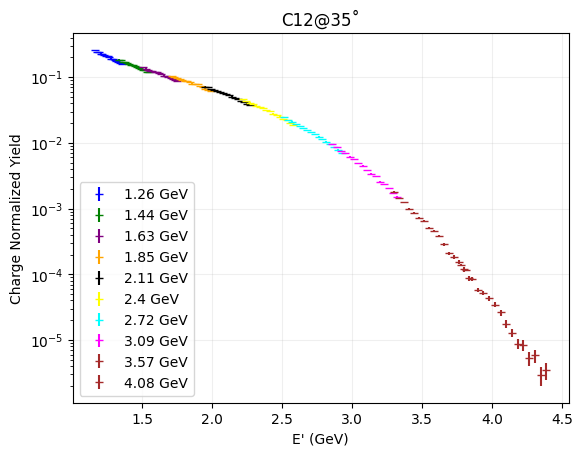

In [81]:
# Calculate the charge normalized yield and the uncertainty per bin
delta_bin_contents_1_ntg, delta_bin_errors_1_ntg = datahist_from_array(delta_hist[dmom[0]], dmom[0], data_delta, antg, eff_weight[dmom[0]])
delta_bin_contents_2_ntg, delta_bin_errors_2_ntg = datahist_from_array(delta_hist[dmom[1]], dmom[1], data_delta, antg, eff_weight[dmom[1]])
delta_bin_contents_3_ntg, delta_bin_errors_3_ntg = datahist_from_array(delta_hist[dmom[2]], dmom[2], data_delta, antg, eff_weight[dmom[2]])
delta_bin_contents_4_ntg, delta_bin_errors_4_ntg = datahist_from_array(delta_hist[dmom[3]], dmom[3], data_delta, antg, eff_weight[dmom[3]])
delta_bin_contents_5_ntg, delta_bin_errors_5_ntg = datahist_from_array(delta_hist[dmom[4]], dmom[4], data_delta, antg, eff_weight[dmom[4]])
delta_bin_contents_6_ntg, delta_bin_errors_6_ntg = datahist_from_array(delta_hist[dmom[5]], dmom[5], data_delta, antg, eff_weight[dmom[5]])
delta_bin_contents_7_ntg, delta_bin_errors_7_ntg = datahist_from_array(delta_hist[dmom[6]], dmom[6], data_delta, antg, eff_weight[dmom[6]])
delta_bin_contents_8_ntg, delta_bin_errors_8_ntg = datahist_from_array(delta_hist[dmom[7]], dmom[7], data_delta, antg, eff_weight[dmom[7]])
delta_bin_contents_9_ntg, delta_bin_errors_9_ntg = datahist_from_array(delta_hist[dmom[8]], dmom[8], data_delta, antg, eff_weight[dmom[8]])
if len(dmom) > 9:
    delta_bin_contents_10_ntg, delta_bin_errors_10_ntg = datahist_from_array(delta_hist[dmom[9]], dmom[9], data_delta, antg, eff_weight[dmom[9]])

# Update the histogram and bin edges
_, delta_bin_edges_1 = np.histogram(delta_hist[dmom[0]], bins = data_delta)
_, delta_bin_edges_2 = np.histogram(delta_hist[dmom[1]], bins = data_delta)
_, delta_bin_edges_3 = np.histogram(delta_hist[dmom[2]], bins = data_delta)
_, delta_bin_edges_4 = np.histogram(delta_hist[dmom[3]], bins = data_delta)
_, delta_bin_edges_5 = np.histogram(delta_hist[dmom[4]], bins = data_delta)
_, delta_bin_edges_6 = np.histogram(delta_hist[dmom[5]], bins = data_delta)
_, delta_bin_edges_7 = np.histogram(delta_hist[dmom[6]], bins = data_delta)
_, delta_bin_edges_8 = np.histogram(delta_hist[dmom[7]], bins = data_delta)
_, delta_bin_edges_9 = np.histogram(delta_hist[dmom[8]], bins = data_delta)
if len(dmom) > 9:
    _, delta_bin_edges_10 = np.histogram(delta_hist[dmom[9]], bins = data_delta)

# Calculate bin centers
delta_bin_centers_1 = (delta_bin_edges_1[:-1] + delta_bin_edges_1[1:]) / 2
delta_bin_centers_2 = (delta_bin_edges_2[:-1] + delta_bin_edges_2[1:]) / 2
delta_bin_centers_3 = (delta_bin_edges_3[:-1] + delta_bin_edges_3[1:]) / 2
delta_bin_centers_4 = (delta_bin_edges_4[:-1] + delta_bin_edges_4[1:]) / 2
delta_bin_centers_5 = (delta_bin_edges_5[:-1] + delta_bin_edges_5[1:]) / 2
delta_bin_centers_6 = (delta_bin_edges_6[:-1] + delta_bin_edges_6[1:]) / 2
delta_bin_centers_7 = (delta_bin_edges_7[:-1] + delta_bin_edges_7[1:]) / 2
delta_bin_centers_8 = (delta_bin_edges_8[:-1] + delta_bin_edges_8[1:]) / 2
delta_bin_centers_9 = (delta_bin_edges_9[:-1] + delta_bin_edges_9[1:]) / 2
if len(dmom) > 9:
    delta_bin_centers_10 = (delta_bin_edges_10[:-1] + delta_bin_edges_10[1:]) / 2

# Update binned eprime bin centers
binned_eprime_bin_centers_1 = dmom[0] * (1 + 0.01 * delta_bin_centers_1)
binned_eprime_bin_centers_2 = dmom[1] * (1 + 0.01 * delta_bin_centers_2)
binned_eprime_bin_centers_3 = dmom[2] * (1 + 0.01 * delta_bin_centers_3)
binned_eprime_bin_centers_4 = dmom[3] * (1 + 0.01 * delta_bin_centers_4)
binned_eprime_bin_centers_5 = dmom[4] * (1 + 0.01 * delta_bin_centers_5)
binned_eprime_bin_centers_6 = dmom[5] * (1 + 0.01 * delta_bin_centers_6)
binned_eprime_bin_centers_7 = dmom[6] * (1 + 0.01 * delta_bin_centers_7)
binned_eprime_bin_centers_8 = dmom[7] * (1 + 0.01 * delta_bin_centers_8)
binned_eprime_bin_centers_9 = dmom[8] * (1 + 0.01 * delta_bin_centers_9)
if len(dmom) > 9:
    binned_eprime_bin_centers_10 = dmom[9] * (1 + 0.01 * delta_bin_centers_10)

# Calculate the charge symmetric background fraction per bin
csb_frac_1_ntg = csb(binned_eprime_bin_centers_1, ntg, dang)
csb_frac_2_ntg = csb(binned_eprime_bin_centers_2, ntg, dang)
csb_frac_3_ntg = csb(binned_eprime_bin_centers_3, ntg, dang)
csb_frac_4_ntg = csb(binned_eprime_bin_centers_4, ntg, dang)
csb_frac_5_ntg = csb(binned_eprime_bin_centers_5, ntg, dang)
csb_frac_6_ntg = csb(binned_eprime_bin_centers_6, ntg, dang)
csb_frac_7_ntg = csb(binned_eprime_bin_centers_7, ntg, dang)
csb_frac_8_ntg = csb(binned_eprime_bin_centers_8, ntg, dang)
csb_frac_9_ntg = csb(binned_eprime_bin_centers_9, ntg, dang)
if len(dmom) > 9:
    csb_frac_10_ntg = csb(binned_eprime_bin_centers_10, ntg, dang)

# Subtract the charge symmetric background fraction from the total yield
subtracted_csb_contents_1_ntg = delta_bin_contents_1_ntg * (1 - csb_frac_1_ntg)
subtracted_csb_contents_2_ntg = delta_bin_contents_2_ntg * (1 - csb_frac_2_ntg)
subtracted_csb_contents_3_ntg = delta_bin_contents_3_ntg * (1 - csb_frac_3_ntg)
subtracted_csb_contents_4_ntg = delta_bin_contents_4_ntg * (1 - csb_frac_4_ntg)
subtracted_csb_contents_5_ntg = delta_bin_contents_5_ntg * (1 - csb_frac_5_ntg)
subtracted_csb_contents_6_ntg = delta_bin_contents_6_ntg * (1 - csb_frac_6_ntg)
subtracted_csb_contents_7_ntg = delta_bin_contents_7_ntg * (1 - csb_frac_7_ntg)
subtracted_csb_contents_8_ntg = delta_bin_contents_8_ntg * (1 - csb_frac_8_ntg)
subtracted_csb_contents_9_ntg = delta_bin_contents_9_ntg * (1 - csb_frac_9_ntg)
if len(dmom) > 9:
    subtracted_csb_contents_10_ntg = delta_bin_contents_10_ntg * (1 - csb_frac_10_ntg)

# Add the errors in quadrature
subtracted_csb_errors_1_ntg = delta_bin_errors_1_ntg * (1 - csb_frac_1_ntg)
subtracted_csb_errors_2_ntg = delta_bin_errors_2_ntg * (1 - csb_frac_2_ntg)
subtracted_csb_errors_3_ntg = delta_bin_errors_3_ntg * (1 - csb_frac_3_ntg)
subtracted_csb_errors_4_ntg = delta_bin_errors_4_ntg * (1 - csb_frac_4_ntg)
subtracted_csb_errors_5_ntg = delta_bin_errors_5_ntg * (1 - csb_frac_5_ntg)
subtracted_csb_errors_6_ntg = delta_bin_errors_6_ntg * (1 - csb_frac_6_ntg)
subtracted_csb_errors_7_ntg = delta_bin_errors_7_ntg * (1 - csb_frac_7_ntg)
subtracted_csb_errors_8_ntg = delta_bin_errors_8_ntg * (1 - csb_frac_8_ntg)
subtracted_csb_errors_9_ntg = delta_bin_errors_9_ntg * (1 - csb_frac_9_ntg)
if len(dmom) > 9:
    subtracted_csb_errors_10_ntg = delta_bin_errors_10_ntg * (1 - csb_frac_10_ntg)

# fig refers to the entire canvas on which plots are drawn. ax refers to a single plot/subplot
fig, ax = plt.subplots()
ax.errorbar(binned_eprime_bin_centers_1, delta_bin_contents_1_ntg, yerr = delta_bin_errors_1_ntg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax.errorbar(binned_eprime_bin_centers_2, delta_bin_contents_2_ntg, yerr = delta_bin_errors_2_ntg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax.errorbar(binned_eprime_bin_centers_3, delta_bin_contents_3_ntg, yerr = delta_bin_errors_3_ntg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax.errorbar(binned_eprime_bin_centers_4, delta_bin_contents_4_ntg, yerr = delta_bin_errors_4_ntg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax.errorbar(binned_eprime_bin_centers_5, delta_bin_contents_5_ntg, yerr = delta_bin_errors_5_ntg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax.errorbar(binned_eprime_bin_centers_6, delta_bin_contents_6_ntg, yerr = delta_bin_errors_6_ntg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax.errorbar(binned_eprime_bin_centers_7, delta_bin_contents_7_ntg, yerr = delta_bin_errors_7_ntg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax.errorbar(binned_eprime_bin_centers_8, delta_bin_contents_8_ntg, yerr = delta_bin_errors_8_ntg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
ax.errorbar(binned_eprime_bin_centers_9, delta_bin_contents_9_ntg, yerr = delta_bin_errors_9_ntg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax.errorbar(binned_eprime_bin_centers_10, delta_bin_contents_10_ntg, yerr = delta_bin_errors_10_ntg, fmt = '_', color = rs[9], label = f'{dmom[9]} GeV')
ax.set_ylabel('Charge Normalized Yield')
ax.set_xlabel('E\' (GeV)')
ax.set_title(f'{ntg}@{idang}˚')
ax.legend()
ax.grid(alpha = 0.2)
ax.set_yscale('log')
# fig.savefig(f'{folder}/{nsimstring}_{dsimstring}_newyield.pdf')

<h1 align = 'center'> TARGET SPECIFIC DATA YIELD CORRECTION</h1>

In [82]:
if ntg == 'Ca48':
    print("Correcting for Ca40 contamination in Ca48 target")
    C = 0.113 # Ratio of Ca40 contamination in Ca48 target to Ca40 target
    cont_tg = 'Ca40'

elif ntg == 'B10':
    print("Correcting for C12 contamination in B10 target")
    C = 0.231 # Ratio of C12 contamination in B10 target to C12 target
    cont_tg = 'C12'

elif ntg == 'B11':
    print("Correcting for C12 contamination in B11 target")
    C = 0.236 # Ratio of C12 contamination in B11 target to C12 target
    cont_tg = 'C12'

elif ntg == 'He3' or ntg == 'LD2':
    print("Performing Aluminum cell wall subtraction")
    C = 0.2165 # Mean of Ratio of upstream & downstream dummy to target cell thickness
    acont_tg = ald + '_' + str(int(dang))
    
else:
    print("No contamination correction needed")
    C = 0

if C != 0:
    cont_dict_name = f'{acont_tg}_dict' # Dictionary containing the runs for the contaminant
    cont_dict = globals()[cont_dict_name]    
    for momentum in dmom:
        files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in cont_dict[momentum]]
        branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
        electrons = uproot.concatenate(files, branches)

        data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
        dp_cut = electrons['H_gtr_dp'][data_cut]
        theta_cut = electrons['H_gtr_th'][data_cut]
        phi_cut = electrons['H_gtr_ph'][data_cut]

        eff_weight[momentum] = 1 / cereff(dp_cut) # Cherenkov efficiency correction

        theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
        delta_hist[momentum] = np.array(dp_cut)
    # Get yield and yield error from array
    contaminant_eprime_bin_contents_1, contaminant_eprime_bin_errors_1 = datahist_from_array(delta_hist[dmom[0]], dmom[0], data_delta, acont_tg, eff_weight[dmom[0]])
    contaminant_eprime_bin_contents_2, contaminant_eprime_bin_errors_2 = datahist_from_array(delta_hist[dmom[1]], dmom[1], data_delta, acont_tg, eff_weight[dmom[1]])
    contaminant_eprime_bin_contents_3, contaminant_eprime_bin_errors_3 = datahist_from_array(delta_hist[dmom[2]], dmom[2], data_delta, acont_tg, eff_weight[dmom[2]])
    contaminant_eprime_bin_contents_4, contaminant_eprime_bin_errors_4 = datahist_from_array(delta_hist[dmom[3]], dmom[3], data_delta, acont_tg, eff_weight[dmom[3]])
    contaminant_eprime_bin_contents_5, contaminant_eprime_bin_errors_5 = datahist_from_array(delta_hist[dmom[4]], dmom[4], data_delta, acont_tg, eff_weight[dmom[4]])
    contaminant_eprime_bin_contents_6, contaminant_eprime_bin_errors_6 = datahist_from_array(delta_hist[dmom[5]], dmom[5], data_delta, acont_tg, eff_weight[dmom[5]])
    contaminant_eprime_bin_contents_7, contaminant_eprime_bin_errors_7 = datahist_from_array(delta_hist[dmom[6]], dmom[6], data_delta, acont_tg, eff_weight[dmom[6]])
    contaminant_eprime_bin_contents_8, contaminant_eprime_bin_errors_8 = datahist_from_array(delta_hist[dmom[7]], dmom[7], data_delta, acont_tg, eff_weight[dmom[7]])
    contaminant_eprime_bin_contents_9, contaminant_eprime_bin_errors_9 = datahist_from_array(delta_hist[dmom[8]], dmom[8], data_delta, acont_tg, eff_weight[dmom[8]])
    if len(dmom) > 9:
        contaminant_eprime_bin_contents_10, contaminant_eprime_bin_errors_10 = datahist_from_array(delta_hist[dmom[9]], dmom[9], data_delta, acont_tg, eff_weight[dmom[9]])

    # Calculate the charge symmetric background fraction per bin for contaminant
    csb_frac_1_cont = csb(binned_eprime_bin_centers_1, acont_tg, dang)
    csb_frac_2_cont = csb(binned_eprime_bin_centers_2, acont_tg, dang)
    csb_frac_3_cont = csb(binned_eprime_bin_centers_3, acont_tg, dang)
    csb_frac_4_cont = csb(binned_eprime_bin_centers_4, acont_tg, dang)
    csb_frac_5_cont = csb(binned_eprime_bin_centers_5, acont_tg, dang)
    csb_frac_6_cont = csb(binned_eprime_bin_centers_6, acont_tg, dang)
    csb_frac_7_cont = csb(binned_eprime_bin_centers_7, acont_tg, dang)
    csb_frac_8_cont = csb(binned_eprime_bin_centers_8, acont_tg, dang)
    csb_frac_9_cont = csb(binned_eprime_bin_centers_9, acont_tg, dang)
    if len(dmom) > 9:
        csb_frac_10_cont = csb(binned_eprime_bin_centers_10, acont_tg, dang)

    # Error propagation
    contaminant_eprime_bin_errors_1 = contaminant_eprime_bin_errors_1 * (1 - csb_frac_1_cont)
    contaminant_eprime_bin_errors_2 = contaminant_eprime_bin_errors_2 * (1 - csb_frac_2_cont)
    contaminant_eprime_bin_errors_3 = contaminant_eprime_bin_errors_3 * (1 - csb_frac_3_cont)
    contaminant_eprime_bin_errors_4 = contaminant_eprime_bin_errors_4 * (1 - csb_frac_4_cont)
    contaminant_eprime_bin_errors_5 = contaminant_eprime_bin_errors_5 * (1 - csb_frac_5_cont)
    contaminant_eprime_bin_errors_6 = contaminant_eprime_bin_errors_6 * (1 - csb_frac_6_cont)
    contaminant_eprime_bin_errors_7 = contaminant_eprime_bin_errors_7 * (1 - csb_frac_7_cont)
    contaminant_eprime_bin_errors_8 = contaminant_eprime_bin_errors_8 * (1 - csb_frac_8_cont)
    contaminant_eprime_bin_errors_9 = contaminant_eprime_bin_errors_9 * (1 - csb_frac_9_cont)
    if len(dmom) > 9:
        contaminant_eprime_bin_errors_10 = contaminant_eprime_bin_errors_10 * (1 - csb_frac_10_cont)

    # Subtract CSB from the total yield of the contaminant
    subtracted_bin_contents_1_cont = contaminant_eprime_bin_contents_1 * (1 - csb_frac_1_cont)
    subtracted_bin_contents_2_cont = contaminant_eprime_bin_contents_2 * (1 - csb_frac_2_cont)
    subtracted_bin_contents_3_cont = contaminant_eprime_bin_contents_3 * (1 - csb_frac_3_cont)
    subtracted_bin_contents_4_cont = contaminant_eprime_bin_contents_4 * (1 - csb_frac_4_cont)
    subtracted_bin_contents_5_cont = contaminant_eprime_bin_contents_5 * (1 - csb_frac_5_cont)
    subtracted_bin_contents_6_cont = contaminant_eprime_bin_contents_6 * (1 - csb_frac_6_cont)
    subtracted_bin_contents_7_cont = contaminant_eprime_bin_contents_7 * (1 - csb_frac_7_cont)
    subtracted_bin_contents_8_cont = contaminant_eprime_bin_contents_8 * (1 - csb_frac_8_cont)
    subtracted_bin_contents_9_cont = contaminant_eprime_bin_contents_9 * (1 - csb_frac_9_cont)
    if len(dmom) > 9:
        subtracted_bin_contents_10_cont = contaminant_eprime_bin_contents_10 * (1 - csb_frac_10_cont)

    # Perform Contamination Subtraction
    subtracted_bin_contents_1_ntg = subtracted_csb_contents_1_ntg - (C * subtracted_bin_contents_1_cont)
    subtracted_bin_contents_2_ntg = subtracted_csb_contents_2_ntg - (C * subtracted_bin_contents_2_cont)
    subtracted_bin_contents_3_ntg = subtracted_csb_contents_3_ntg - (C * subtracted_bin_contents_3_cont)
    subtracted_bin_contents_4_ntg = subtracted_csb_contents_4_ntg - (C * subtracted_bin_contents_4_cont)
    subtracted_bin_contents_5_ntg = subtracted_csb_contents_5_ntg - (C * subtracted_bin_contents_5_cont)
    subtracted_bin_contents_6_ntg = subtracted_csb_contents_6_ntg - (C * subtracted_bin_contents_6_cont)
    subtracted_bin_contents_7_ntg = subtracted_csb_contents_7_ntg - (C * subtracted_bin_contents_7_cont)
    subtracted_bin_contents_8_ntg = subtracted_csb_contents_8_ntg - (C * subtracted_bin_contents_8_cont)
    subtracted_bin_contents_9_ntg = subtracted_csb_contents_9_ntg - (C * subtracted_bin_contents_9_cont)
    if len(dmom) > 9:
        subtracted_bin_contents_10_ntg = subtracted_csb_contents_10_ntg - (C * subtracted_bin_contents_10_cont)

    # Add the errors in quadrature
    subtracted_bin_errors_1_ntg = np.sqrt((subtracted_csb_errors_1_ntg)**2 + (C * contaminant_eprime_bin_errors_1)**2)
    subtracted_bin_errors_2_ntg = np.sqrt((subtracted_csb_errors_2_ntg)**2 + (C * contaminant_eprime_bin_errors_2)**2)
    subtracted_bin_errors_3_ntg = np.sqrt((subtracted_csb_errors_3_ntg)**2 + (C * contaminant_eprime_bin_errors_3)**2)
    subtracted_bin_errors_4_ntg = np.sqrt((subtracted_csb_errors_4_ntg)**2 + (C * contaminant_eprime_bin_errors_4)**2)
    subtracted_bin_errors_5_ntg = np.sqrt((subtracted_csb_errors_5_ntg)**2 + (C * contaminant_eprime_bin_errors_5)**2)
    subtracted_bin_errors_6_ntg = np.sqrt((subtracted_csb_errors_6_ntg)**2 + (C * contaminant_eprime_bin_errors_6)**2)
    subtracted_bin_errors_7_ntg = np.sqrt((subtracted_csb_errors_7_ntg)**2 + (C * contaminant_eprime_bin_errors_7)**2)
    subtracted_bin_errors_8_ntg = np.sqrt((subtracted_csb_errors_8_ntg)**2 + (C * contaminant_eprime_bin_errors_8)**2)
    subtracted_bin_errors_9_ntg = np.sqrt((subtracted_csb_errors_9_ntg)**2 + (C * contaminant_eprime_bin_errors_9)**2)
    if len(dmom) > 9:
        subtracted_bin_errors_10_ntg = np.sqrt((subtracted_csb_errors_10_ntg)**2 + (C * contaminant_eprime_bin_errors_10)**2)

    # Updated plot
    fig, ax = plt.subplots()
    ax.errorbar(binned_eprime_bin_centers_1, subtracted_bin_contents_1_ntg, yerr = subtracted_bin_errors_1_ntg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
    ax.errorbar(binned_eprime_bin_centers_2, subtracted_bin_contents_2_ntg, yerr = subtracted_bin_errors_2_ntg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
    ax.errorbar(binned_eprime_bin_centers_3, subtracted_bin_contents_3_ntg, yerr = subtracted_bin_errors_3_ntg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
    ax.errorbar(binned_eprime_bin_centers_4, subtracted_bin_contents_4_ntg, yerr = subtracted_bin_errors_4_ntg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
    ax.errorbar(binned_eprime_bin_centers_5, subtracted_bin_contents_5_ntg, yerr = subtracted_bin_errors_5_ntg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
    ax.errorbar(binned_eprime_bin_centers_6, subtracted_bin_contents_6_ntg, yerr = subtracted_bin_errors_6_ntg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
    ax.errorbar(binned_eprime_bin_centers_7, subtracted_bin_contents_7_ntg, yerr = subtracted_bin_errors_7_ntg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
    ax.errorbar(binned_eprime_bin_centers_8, subtracted_bin_contents_8_ntg, yerr = subtracted_bin_errors_8_ntg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
    ax.errorbar(binned_eprime_bin_centers_9, subtracted_bin_contents_9_ntg, yerr = subtracted_bin_errors_9_ntg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
    if len(dmom) > 9:
        ax.errorbar(binned_eprime_bin_centers_10, subtracted_bin_contents_10_ntg, yerr = subtracted_bin_errors_10_ntg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
    ax.set_xlabel('E\' (GeV)')
    ax.set_ylabel('Charge Normalized Yield')
    ax.set_title('Data-Contamination Subtracted')
    ax.grid(alpha = 0.2)
    # ax.set_yscale('log')
    # fig.savefig(f'{folder}/plots/contamination_subtraction_yield_{ntg}_{time.time():.0f}.pdf')

No contamination correction needed


<h1 align="center">SIMULATION WORK FOR NTG</h1>


Should be -8 and +8 -7.999996767165523 7.999992890744834


Text(0.5, 1.0, 'C12@35.0˚ Simulation')

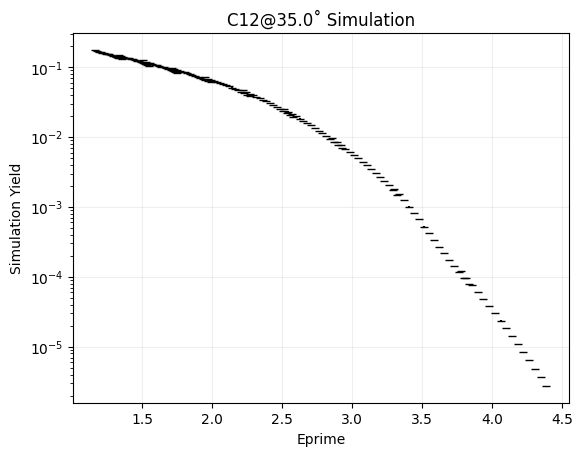

In [83]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor(f"/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_{nsimstring}22_hms.out")

Eprime_dict = {}
delta_dict = {}
xsec_array = {}
mc_scale = {}
thetadict = {}
ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
delta_weight = {}
idang = int(dang)

for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # mom_str = str(momentum).replace('-', '').replace('.', 'p')
    # filepath = f"/Volumes/smriti/xem2/worksim/hms_mc_{nsimstring}_{idang}degm{mom_str}.root"
    # New MC files
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{nsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the delta correction
    electrons["hsdeltai"] = (0.990337 * electrons["hsdeltai"]) - 0.00236077 * (electrons["hsdeltai"]**2) + 0.000286814 * (electrons["hsdeltai"]**3) + 2.09878E-6 * (electrons["hsdeltai"]**4) - 2.48674E-6 * (electrons["hsdeltai"]**5) + 1.8646E-7 * (electrons["hsdeltai"]**6) # According to Cameron's log entry
        
    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) <= 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut

    delta_weight[momentum] = 1 # Delta correction already applied. No need to apply it as a weight. This is a relic of the old code

    # Calculate E' and theta (in degrees)
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), -1.5)
        
    # Perform the interpolation
    points_ntg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))
    xsec_array[momentum] = griddata(points_ntg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section (V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = (lumin * domega * (ep_max[momentum] - ep_min[momentum])) / nentries         # Calculate the scale for simulation
    # print(f"Scale for {momentum} GeV: {mc_scale[momentum]}")
    thetadict[momentum] = thetadeg

hsdelta_min, hsdelta_max = np.min(delta_dict[dmom[0]]), np.max(delta_dict[dmom[0]])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, bin_per_mom + 1)

# This function returns 2 arrays: bin counts (the counts in each bin taking weights into account) and bin edges (the edges of the bins)
bin_edges_delta_1 = np.histogram(delta_dict[dmom[0]], weights = xsec_array[dmom[0]] * mc_scale[dmom[0]], bins = hsdelta_binedges)[1]
bin_edges_delta_2 = np.histogram(delta_dict[dmom[1]], weights = xsec_array[dmom[1]] * mc_scale[dmom[1]], bins = hsdelta_binedges)[1]
bin_edges_delta_3 = np.histogram(delta_dict[dmom[2]], weights = xsec_array[dmom[2]] * mc_scale[dmom[2]], bins = hsdelta_binedges)[1]
bin_edges_delta_4 = np.histogram(delta_dict[dmom[3]], weights = xsec_array[dmom[3]] * mc_scale[dmom[3]], bins = hsdelta_binedges)[1]
bin_edges_delta_5 = np.histogram(delta_dict[dmom[4]], weights = xsec_array[dmom[4]] * mc_scale[dmom[4]], bins = hsdelta_binedges)[1]
bin_edges_delta_6 = np.histogram(delta_dict[dmom[5]], weights = xsec_array[dmom[5]] * mc_scale[dmom[5]], bins = hsdelta_binedges)[1]
bin_edges_delta_7 = np.histogram(delta_dict[dmom[6]], weights = xsec_array[dmom[6]] * mc_scale[dmom[6]], bins = hsdelta_binedges)[1]
bin_edges_delta_8 = np.histogram(delta_dict[dmom[7]], weights = xsec_array[dmom[7]] * mc_scale[dmom[7]], bins = hsdelta_binedges)[1]
bin_edges_delta_9 = np.histogram(delta_dict[dmom[8]], weights = xsec_array[dmom[8]] * mc_scale[dmom[8]], bins = hsdelta_binedges)[1]
if len(dmom) > 9:
    bin_edges_delta_10 = np.histogram(delta_dict[dmom[9]], weights = xsec_array[dmom[9]] * mc_scale[dmom[9]], bins = hsdelta_binedges)[1]

# Gets the yield and yield error
bin_counts_eprime_1_mc_ntg, bin_errors_eprime_1_mc_ntg = mchist_from_array(delta_dict[dmom[0]], xsec_array[dmom[0]] * mc_scale[dmom[0]] * ytar_weight[dmom[0]] * jacobian_weight[dmom[0]] * delta_weight[dmom[0]], hsdelta_binedges)
bin_counts_eprime_2_mc_ntg, bin_errors_eprime_2_mc_ntg = mchist_from_array(delta_dict[dmom[1]], xsec_array[dmom[1]] * mc_scale[dmom[1]] * ytar_weight[dmom[1]] * jacobian_weight[dmom[1]] * delta_weight[dmom[1]], hsdelta_binedges)
bin_counts_eprime_3_mc_ntg, bin_errors_eprime_3_mc_ntg = mchist_from_array(delta_dict[dmom[2]], xsec_array[dmom[2]] * mc_scale[dmom[2]] * ytar_weight[dmom[2]] * jacobian_weight[dmom[2]] * delta_weight[dmom[2]], hsdelta_binedges)
bin_counts_eprime_4_mc_ntg, bin_errors_eprime_4_mc_ntg = mchist_from_array(delta_dict[dmom[3]], xsec_array[dmom[3]] * mc_scale[dmom[3]] * ytar_weight[dmom[3]] * jacobian_weight[dmom[3]] * delta_weight[dmom[3]], hsdelta_binedges)
bin_counts_eprime_5_mc_ntg, bin_errors_eprime_5_mc_ntg = mchist_from_array(delta_dict[dmom[4]], xsec_array[dmom[4]] * mc_scale[dmom[4]] * ytar_weight[dmom[4]] * jacobian_weight[dmom[4]] * delta_weight[dmom[4]], hsdelta_binedges)
bin_counts_eprime_6_mc_ntg, bin_errors_eprime_6_mc_ntg = mchist_from_array(delta_dict[dmom[5]], xsec_array[dmom[5]] * mc_scale[dmom[5]] * ytar_weight[dmom[5]] * jacobian_weight[dmom[5]] * delta_weight[dmom[5]], hsdelta_binedges)
bin_counts_eprime_7_mc_ntg, bin_errors_eprime_7_mc_ntg = mchist_from_array(delta_dict[dmom[6]], xsec_array[dmom[6]] * mc_scale[dmom[6]] * ytar_weight[dmom[6]] * jacobian_weight[dmom[6]] * delta_weight[dmom[6]], hsdelta_binedges)
bin_counts_eprime_8_mc_ntg, bin_errors_eprime_8_mc_ntg = mchist_from_array(delta_dict[dmom[7]], xsec_array[dmom[7]] * mc_scale[dmom[7]] * ytar_weight[dmom[7]] * jacobian_weight[dmom[7]] * delta_weight[dmom[7]], hsdelta_binedges)
bin_counts_eprime_9_mc_ntg, bin_errors_eprime_9_mc_ntg = mchist_from_array(delta_dict[dmom[8]], xsec_array[dmom[8]] * mc_scale[dmom[8]] * ytar_weight[dmom[8]] * jacobian_weight[dmom[8]] * delta_weight[dmom[8]], hsdelta_binedges)
if len(dmom) > 9:
    bin_counts_eprime_10_mc_ntg, bin_errors_eprime_10_mc_ntg = mchist_from_array(delta_dict[dmom[9]], xsec_array[dmom[9]] * mc_scale[dmom[9]] * ytar_weight[dmom[9]] * jacobian_weight[dmom[9]] * delta_weight[dmom[9]], hsdelta_binedges)


# Calculate bin centers
bin_centers_delta_1 = (bin_edges_delta_1[:-1] + bin_edges_delta_1[1:]) / 2
bin_centers_delta_2 = (bin_edges_delta_2[:-1] + bin_edges_delta_2[1:]) / 2
bin_centers_delta_3 = (bin_edges_delta_3[:-1] + bin_edges_delta_3[1:]) / 2
bin_centers_delta_4 = (bin_edges_delta_4[:-1] + bin_edges_delta_4[1:]) / 2
bin_centers_delta_5 = (bin_edges_delta_5[:-1] + bin_edges_delta_5[1:]) / 2
bin_centers_delta_6 = (bin_edges_delta_6[:-1] + bin_edges_delta_6[1:]) / 2
bin_centers_delta_7 = (bin_edges_delta_7[:-1] + bin_edges_delta_7[1:]) / 2
bin_centers_delta_8 = (bin_edges_delta_8[:-1] + bin_edges_delta_8[1:]) / 2
bin_centers_delta_9 = (bin_edges_delta_9[:-1] + bin_edges_delta_9[1:]) / 2
if len(dmom) > 9:
    bin_centers_delta_10 = (bin_edges_delta_10[:-1] + bin_edges_delta_10[1:]) / 2

# Calculate binned eprime bin centers
binned_eprime_bin_centers_1_mc_ntg = dmom[0] * (1 + 0.01 * bin_centers_delta_1)
binned_eprime_bin_centers_2_mc_ntg = dmom[1] * (1 + 0.01 * bin_centers_delta_2)
binned_eprime_bin_centers_3_mc_ntg = dmom[2] * (1 + 0.01 * bin_centers_delta_3)
binned_eprime_bin_centers_4_mc_ntg = dmom[3] * (1 + 0.01 * bin_centers_delta_4)
binned_eprime_bin_centers_5_mc_ntg = dmom[4] * (1 + 0.01 * bin_centers_delta_5)
binned_eprime_bin_centers_6_mc_ntg = dmom[5] * (1 + 0.01 * bin_centers_delta_6)
binned_eprime_bin_centers_7_mc_ntg = dmom[6] * (1 + 0.01 * bin_centers_delta_7)
binned_eprime_bin_centers_8_mc_ntg = dmom[7] * (1 + 0.01 * bin_centers_delta_8)
binned_eprime_bin_centers_9_mc_ntg = dmom[8] * (1 + 0.01 * bin_centers_delta_9)
if len(dmom) > 9:
    binned_eprime_bin_centers_10_mc_ntg = dmom[9] * (1 + 0.01 * bin_centers_delta_10)

# Plotting the histogram with error bars
fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_1_mc_ntg, bin_counts_eprime_1_mc_ntg, yerr = bin_errors_eprime_1_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[0]} GeV')
ax2.errorbar(binned_eprime_bin_centers_2_mc_ntg, bin_counts_eprime_2_mc_ntg, yerr = bin_errors_eprime_2_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[1]} GeV')
ax2.errorbar(binned_eprime_bin_centers_3_mc_ntg, bin_counts_eprime_3_mc_ntg, yerr = bin_errors_eprime_3_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[2]} GeV')
ax2.errorbar(binned_eprime_bin_centers_4_mc_ntg, bin_counts_eprime_4_mc_ntg, yerr = bin_errors_eprime_4_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[3]} GeV')
ax2.errorbar(binned_eprime_bin_centers_5_mc_ntg, bin_counts_eprime_5_mc_ntg, yerr = bin_errors_eprime_5_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[4]} GeV')
ax2.errorbar(binned_eprime_bin_centers_6_mc_ntg, bin_counts_eprime_6_mc_ntg, yerr = bin_errors_eprime_6_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[5]} GeV')
ax2.errorbar(binned_eprime_bin_centers_7_mc_ntg, bin_counts_eprime_7_mc_ntg, yerr = bin_errors_eprime_7_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[6]} GeV')
ax2.errorbar(binned_eprime_bin_centers_8_mc_ntg, bin_counts_eprime_8_mc_ntg, yerr = bin_errors_eprime_8_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[7]} GeV')
ax2.errorbar(binned_eprime_bin_centers_9_mc_ntg, bin_counts_eprime_9_mc_ntg, yerr = bin_errors_eprime_9_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[8]} GeV')
if len(dmom) > 9:
    ax2.errorbar(binned_eprime_bin_centers_10_mc_ntg, bin_counts_eprime_10_mc_ntg, yerr = bin_errors_eprime_10_mc_ntg, fmt = '_', color = 'black', label = f'Sim {dmom[9]} GeV')
ax2.grid(alpha = 0.2)
ax2.set_xlabel('Eprime')
ax2.set_ylabel('Simulation Yield')
ax2.set_yscale('log')
# ax.legend() 
ax2.set_title(f'{ntg}@{dang}˚ Simulation')
# fig2.savefig(f'{folder}/eprime_{ntg}_{dang}_{start_time:.0f}.pdf')

In [84]:
if C == 0:
    subtracted_bin_contents_1_ntg = subtracted_csb_contents_1_ntg
    subtracted_bin_contents_2_ntg = subtracted_csb_contents_2_ntg
    subtracted_bin_contents_3_ntg = subtracted_csb_contents_3_ntg
    subtracted_bin_contents_4_ntg = subtracted_csb_contents_4_ntg
    subtracted_bin_contents_5_ntg = subtracted_csb_contents_5_ntg
    subtracted_bin_contents_6_ntg = subtracted_csb_contents_6_ntg
    subtracted_bin_contents_7_ntg = subtracted_csb_contents_7_ntg
    subtracted_bin_contents_8_ntg = subtracted_csb_contents_8_ntg
    subtracted_bin_contents_9_ntg = subtracted_csb_contents_9_ntg
    if len(dmom) > 9:
        subtracted_bin_contents_10_ntg = subtracted_csb_contents_10_ntg

    subtracted_bin_errors_1_ntg = subtracted_csb_errors_1_ntg
    subtracted_bin_errors_2_ntg = subtracted_csb_errors_2_ntg
    subtracted_bin_errors_3_ntg = subtracted_csb_errors_3_ntg
    subtracted_bin_errors_4_ntg = subtracted_csb_errors_4_ntg
    subtracted_bin_errors_5_ntg = subtracted_csb_errors_5_ntg
    subtracted_bin_errors_6_ntg = subtracted_csb_errors_6_ntg
    subtracted_bin_errors_7_ntg = subtracted_csb_errors_7_ntg
    subtracted_bin_errors_8_ntg = subtracted_csb_errors_8_ntg
    subtracted_bin_errors_9_ntg = subtracted_csb_errors_9_ntg
    if len(dmom) > 9:
        subtracted_bin_errors_10_ntg = subtracted_csb_errors_10_ntg

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR NTG</h1>


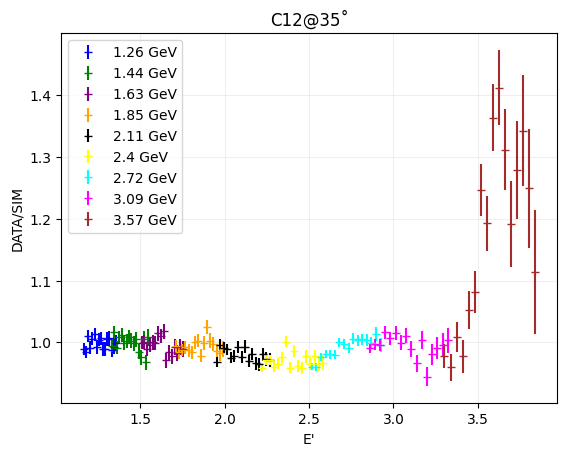

In [85]:
ratio_eprime_1_ntg = subtracted_bin_contents_1_ntg / bin_counts_eprime_1_mc_ntg
ratio_eprime_2_ntg = subtracted_bin_contents_2_ntg / bin_counts_eprime_2_mc_ntg
ratio_eprime_3_ntg = subtracted_bin_contents_3_ntg / bin_counts_eprime_3_mc_ntg
ratio_eprime_4_ntg = subtracted_bin_contents_4_ntg / bin_counts_eprime_4_mc_ntg
ratio_eprime_5_ntg = subtracted_bin_contents_5_ntg / bin_counts_eprime_5_mc_ntg
ratio_eprime_6_ntg = subtracted_bin_contents_6_ntg / bin_counts_eprime_6_mc_ntg
ratio_eprime_7_ntg = subtracted_bin_contents_7_ntg / bin_counts_eprime_7_mc_ntg
ratio_eprime_8_ntg = subtracted_bin_contents_8_ntg / bin_counts_eprime_8_mc_ntg
ratio_eprime_9_ntg = subtracted_bin_contents_9_ntg / bin_counts_eprime_9_mc_ntg
if len(dmom) > 9:
    ratio_eprime_10_ntg = subtracted_bin_contents_10_ntg / bin_counts_eprime_10_mc_ntg

# Add errors in quadrature. First is data and second is MC
ratio_errors_1_ntg = ratio_eprime_1_ntg * np.sqrt((subtracted_bin_errors_1_ntg / subtracted_bin_contents_1_ntg)**2 + (bin_errors_eprime_1_mc_ntg / bin_counts_eprime_1_mc_ntg)**2)
ratio_errors_2_ntg = ratio_eprime_2_ntg * np.sqrt((subtracted_bin_errors_2_ntg / subtracted_bin_contents_2_ntg)**2 + (bin_errors_eprime_2_mc_ntg / bin_counts_eprime_2_mc_ntg)**2)
ratio_errors_3_ntg = ratio_eprime_3_ntg * np.sqrt((subtracted_bin_errors_3_ntg / subtracted_bin_contents_3_ntg)**2 + (bin_errors_eprime_3_mc_ntg / bin_counts_eprime_3_mc_ntg)**2)
ratio_errors_4_ntg = ratio_eprime_4_ntg * np.sqrt((subtracted_bin_errors_4_ntg / subtracted_bin_contents_4_ntg)**2 + (bin_errors_eprime_4_mc_ntg / bin_counts_eprime_4_mc_ntg)**2)
ratio_errors_5_ntg = ratio_eprime_5_ntg * np.sqrt((subtracted_bin_errors_5_ntg / subtracted_bin_contents_5_ntg)**2 + (bin_errors_eprime_5_mc_ntg / bin_counts_eprime_5_mc_ntg)**2)
ratio_errors_6_ntg = ratio_eprime_6_ntg * np.sqrt((subtracted_bin_errors_6_ntg / subtracted_bin_contents_6_ntg)**2 + (bin_errors_eprime_6_mc_ntg / bin_counts_eprime_6_mc_ntg)**2)
ratio_errors_7_ntg = ratio_eprime_7_ntg * np.sqrt((subtracted_bin_errors_7_ntg / subtracted_bin_contents_7_ntg)**2 + (bin_errors_eprime_7_mc_ntg / bin_counts_eprime_7_mc_ntg)**2)
ratio_errors_8_ntg = ratio_eprime_8_ntg * np.sqrt((subtracted_bin_errors_8_ntg / subtracted_bin_contents_8_ntg)**2 + (bin_errors_eprime_8_mc_ntg / bin_counts_eprime_8_mc_ntg)**2)
ratio_errors_9_ntg = ratio_eprime_9_ntg * np.sqrt((subtracted_bin_errors_9_ntg / subtracted_bin_contents_9_ntg)**2 + (bin_errors_eprime_9_mc_ntg / bin_counts_eprime_9_mc_ntg)**2)
if len(dmom) > 9:
    ratio_errors_10_ntg = ratio_eprime_10_ntg * np.sqrt((subtracted_bin_errors_10_ntg / subtracted_bin_contents_10_ntg)**2 + (bin_errors_eprime_10_mc_ntg / bin_counts_eprime_10_mc_ntg)**2)

fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_1, ratio_eprime_1_ntg, yerr = ratio_errors_1_ntg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax2.errorbar(binned_eprime_bin_centers_2, ratio_eprime_2_ntg, yerr = ratio_errors_2_ntg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax2.errorbar(binned_eprime_bin_centers_3, ratio_eprime_3_ntg, yerr = ratio_errors_3_ntg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax2.errorbar(binned_eprime_bin_centers_4, ratio_eprime_4_ntg, yerr = ratio_errors_4_ntg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax2.errorbar(binned_eprime_bin_centers_5, ratio_eprime_5_ntg, yerr = ratio_errors_5_ntg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax2.errorbar(binned_eprime_bin_centers_6, ratio_eprime_6_ntg, yerr = ratio_errors_6_ntg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax2.errorbar(binned_eprime_bin_centers_7, ratio_eprime_7_ntg, yerr = ratio_errors_7_ntg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax2.errorbar(binned_eprime_bin_centers_8, ratio_eprime_8_ntg, yerr = ratio_errors_8_ntg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
ax2.errorbar(binned_eprime_bin_centers_9, ratio_eprime_9_ntg, yerr = ratio_errors_9_ntg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    # ax2.errorbar(binned_eprime_bin_centers_10, ratio_eprime_10_ntg, yerr = ratio_errors_10_ntg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
    pass
ax2.set_xlabel('E\'')
ax2.set_ylabel('DATA/SIM')
ax2.set_title(f'{ntg}@{idang}˚')
ax2.grid(alpha = 0.2)
ax2.legend()
# ax2.set_ylim(0.5, 1.1)
# fig2.savefig(f'{folder}/yieldratio_{ntg}_{idang}_{time.time():.0f}.png', dpi = 300)

In [86]:
pymodule = f"{folder}/sandbox.py"
DATAMCratio = np.concatenate((ratio_eprime_1_ntg, ratio_eprime_2_ntg, ratio_eprime_3_ntg, ratio_eprime_4_ntg, ratio_eprime_5_ntg, ratio_eprime_6_ntg, ratio_eprime_7_ntg, ratio_eprime_8_ntg, ratio_eprime_9_ntg, ratio_eprime_10_ntg))
DATAMCerror = np.concatenate((ratio_errors_1_ntg, ratio_errors_2_ntg, ratio_errors_3_ntg, ratio_errors_4_ntg, ratio_errors_5_ntg, ratio_errors_6_ntg, ratio_errors_7_ntg, ratio_errors_8_ntg, ratio_errors_9_ntg, ratio_errors_10_ntg))

with open(pymodule, "a") as f:
    f.write(f'{ntg}_DATAMC_{idang} = {DATAMCratio.tolist()}\n')
    f.write(f'{ntg}_DATAMCerror_{idang} = {DATAMCerror.tolist()}\n')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR NTG</h1>


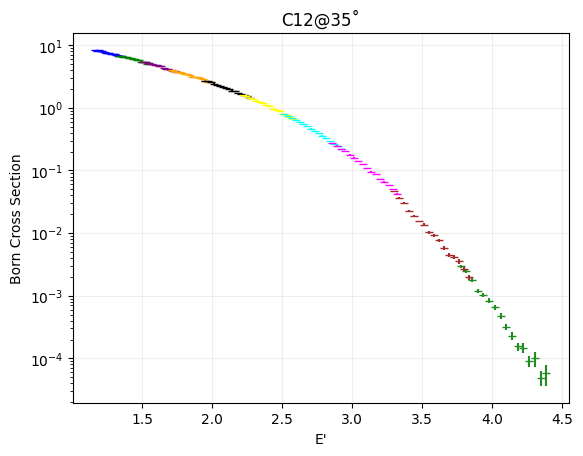

In [87]:
# Get points to interpolate based on angle and E'. Common for ntg and dtg
points_to_interpolate_1 = np.column_stack((binned_eprime_bin_centers_1, np.full(len(binned_eprime_bin_centers_1), dang)))
points_to_interpolate_2 = np.column_stack((binned_eprime_bin_centers_2, np.full(len(binned_eprime_bin_centers_2), dang)))
points_to_interpolate_3 = np.column_stack((binned_eprime_bin_centers_3, np.full(len(binned_eprime_bin_centers_3), dang)))
points_to_interpolate_4 = np.column_stack((binned_eprime_bin_centers_4, np.full(len(binned_eprime_bin_centers_4), dang)))
points_to_interpolate_5 = np.column_stack((binned_eprime_bin_centers_5, np.full(len(binned_eprime_bin_centers_5), dang)))
points_to_interpolate_6 = np.column_stack((binned_eprime_bin_centers_6, np.full(len(binned_eprime_bin_centers_6), dang)))
points_to_interpolate_7 = np.column_stack((binned_eprime_bin_centers_7, np.full(len(binned_eprime_bin_centers_7), dang)))
points_to_interpolate_8 = np.column_stack((binned_eprime_bin_centers_8, np.full(len(binned_eprime_bin_centers_8), dang)))
points_to_interpolate_9 = np.column_stack((binned_eprime_bin_centers_9, np.full(len(binned_eprime_bin_centers_9), dang)))
if len(dmom) > 9:
    points_to_interpolate_10 = np.column_stack((binned_eprime_bin_centers_10, np.full(len(binned_eprime_bin_centers_10), dang)))

# Interpolate again to get model Born cross-section
born_xsec_array_1_ntg = griddata(points_ntg, V6, points_to_interpolate_1, method = 'linear')
born_xsec_array_2_ntg = griddata(points_ntg, V6, points_to_interpolate_2, method = 'linear')
born_xsec_array_3_ntg = griddata(points_ntg, V6, points_to_interpolate_3, method = 'linear')
born_xsec_array_4_ntg = griddata(points_ntg, V6, points_to_interpolate_4, method = 'linear')
born_xsec_array_5_ntg = griddata(points_ntg, V6, points_to_interpolate_5, method = 'linear')
born_xsec_array_6_ntg = griddata(points_ntg, V6, points_to_interpolate_6, method = 'linear')
born_xsec_array_7_ntg = griddata(points_ntg, V6, points_to_interpolate_7, method = 'linear')
born_xsec_array_8_ntg = griddata(points_ntg, V6, points_to_interpolate_8, method = 'linear')
born_xsec_array_9_ntg = griddata(points_ntg, V6, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    born_xsec_array_10_ntg = griddata(points_ntg, V6, points_to_interpolate_10, method = 'linear')

# Get the QE piece
qe_array_1_ntg = griddata(points_ntg, V8, points_to_interpolate_1, method = 'linear')
qe_array_2_ntg = griddata(points_ntg, V8, points_to_interpolate_2, method = 'linear')
qe_array_3_ntg = griddata(points_ntg, V8, points_to_interpolate_3, method = 'linear')
qe_array_4_ntg = griddata(points_ntg, V8, points_to_interpolate_4, method = 'linear')
qe_array_5_ntg = griddata(points_ntg, V8, points_to_interpolate_5, method = 'linear')
qe_array_6_ntg = griddata(points_ntg, V8, points_to_interpolate_6, method = 'linear')
qe_array_7_ntg = griddata(points_ntg, V8, points_to_interpolate_7, method = 'linear')
qe_array_8_ntg = griddata(points_ntg, V8, points_to_interpolate_8, method = 'linear')
qe_array_9_ntg = griddata(points_ntg, V8, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    qe_array_10_ntg = griddata(points_ntg, V8, points_to_interpolate_10, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_1_ntg = griddata(points_ntg, V13, points_to_interpolate_1, method = 'linear')
ccf_2_ntg = griddata(points_ntg, V13, points_to_interpolate_2, method = 'linear')
ccf_3_ntg = griddata(points_ntg, V13, points_to_interpolate_3, method = 'linear')
ccf_4_ntg = griddata(points_ntg, V13, points_to_interpolate_4, method = 'linear')
ccf_5_ntg = griddata(points_ntg, V13, points_to_interpolate_5, method = 'linear')
ccf_6_ntg = griddata(points_ntg, V13, points_to_interpolate_6, method = 'linear')
ccf_7_ntg = griddata(points_ntg, V13, points_to_interpolate_7, method = 'linear')
ccf_8_ntg = griddata(points_ntg, V13, points_to_interpolate_8, method = 'linear')
ccf_9_ntg = griddata(points_ntg, V13, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    ccf_10_ntg = griddata(points_ntg, V13, points_to_interpolate_10, method = 'linear')

fig3, ax3 = plt.subplots()
# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_1_ntg = ratio_eprime_1_ntg * born_xsec_array_1_ntg * ccf_1_ntg
born_cross_2_ntg = ratio_eprime_2_ntg * born_xsec_array_2_ntg * ccf_2_ntg
born_cross_3_ntg = ratio_eprime_3_ntg * born_xsec_array_3_ntg * ccf_3_ntg
born_cross_4_ntg = ratio_eprime_4_ntg * born_xsec_array_4_ntg * ccf_4_ntg
born_cross_5_ntg = ratio_eprime_5_ntg * born_xsec_array_5_ntg * ccf_5_ntg
born_cross_6_ntg = ratio_eprime_6_ntg * born_xsec_array_6_ntg * ccf_6_ntg
born_cross_7_ntg = ratio_eprime_7_ntg * born_xsec_array_7_ntg * ccf_7_ntg
born_cross_8_ntg = ratio_eprime_8_ntg * born_xsec_array_8_ntg * ccf_8_ntg
born_cross_9_ntg = ratio_eprime_9_ntg * born_xsec_array_9_ntg * ccf_9_ntg
if len(dmom) > 9:
    born_cross_10_ntg = ratio_eprime_10_ntg * born_xsec_array_10_ntg * ccf_10_ntg

# Calculate errors for born cross-sections
born_errors_1_ntg = born_cross_1_ntg * ratio_errors_1_ntg
born_errors_2_ntg = born_cross_2_ntg * ratio_errors_2_ntg
born_errors_3_ntg = born_cross_3_ntg * ratio_errors_3_ntg
born_errors_4_ntg = born_cross_4_ntg * ratio_errors_4_ntg
born_errors_5_ntg = born_cross_5_ntg * ratio_errors_5_ntg
born_errors_6_ntg = born_cross_6_ntg * ratio_errors_6_ntg
born_errors_7_ntg = born_cross_7_ntg * ratio_errors_7_ntg
born_errors_8_ntg = born_cross_8_ntg * ratio_errors_8_ntg
born_errors_9_ntg = born_cross_9_ntg * ratio_errors_9_ntg
if len(dmom) > 9:
    born_errors_10_ntg = born_cross_10_ntg * ratio_errors_10_ntg

# Plotting the born cross-sections with errors
ax3.errorbar(binned_eprime_bin_centers_1, born_cross_1_ntg, yerr = born_errors_1_ntg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax3.errorbar(binned_eprime_bin_centers_2, born_cross_2_ntg, yerr = born_errors_2_ntg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax3.errorbar(binned_eprime_bin_centers_3, born_cross_3_ntg, yerr = born_errors_3_ntg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax3.errorbar(binned_eprime_bin_centers_4, born_cross_4_ntg, yerr = born_errors_4_ntg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax3.errorbar(binned_eprime_bin_centers_5, born_cross_5_ntg, yerr = born_errors_5_ntg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax3.errorbar(binned_eprime_bin_centers_6, born_cross_6_ntg, yerr = born_errors_6_ntg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax3.errorbar(binned_eprime_bin_centers_7, born_cross_7_ntg, yerr = born_errors_7_ntg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax3.errorbar(binned_eprime_bin_centers_8, born_cross_8_ntg, yerr = born_errors_8_ntg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
ax3.errorbar(binned_eprime_bin_centers_9, born_cross_9_ntg, yerr = born_errors_9_ntg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax3.errorbar(binned_eprime_bin_centers_10, born_cross_10_ntg, yerr = born_errors_10_ntg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax3.set_xlabel('E\'')
ax3.set_ylabel('Born Cross Section')
ax3.set_title(f'{ntg}@{idang}˚')
ax3.set_yscale('log')
#ax3.legend()
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/xsec_{ntg}_{idang}_{start_time:.0f}.pdf')

<h1 align="center">DATA WORK FOR DUMMY TARGET</h1>


Mean scaling factor for Dummy_35 at 1.26 GeV/c is 9.516995280568592e-05
Total scaling factor for Dummy_35 at 1.26 GeV/c is 21015.036164655008
Scaling factor for Dummy_35 at 1.26 GeV/c is 4.758497640284296e-05
Counts for Dummy_35 at 1.26 GeV is 3530
Mean scaling factor for Dummy_35 at 1.44 GeV/c is 0.00015530919648375127
Total scaling factor for Dummy_35 at 1.44 GeV/c is 12877.53748831766
Scaling factor for Dummy_35 at 1.44 GeV/c is 7.765459824187563e-05
Counts for Dummy_35 at 1.44 GeV is 1593
Mean scaling factor for Dummy_35 at 1.63 GeV/c is 8.659359806847729e-05
Total scaling factor for Dummy_35 at 1.63 GeV/c is 23096.395629829603
Scaling factor for Dummy_35 at 1.63 GeV/c is 4.329679903423864e-05
Counts for Dummy_35 at 1.63 GeV is 2162
Mean scaling factor for Dummy_35 at 1.85 GeV/c is 3.074113411575863e-05
Total scaling factor for Dummy_35 at 1.85 GeV/c is 32529.70421437303
Scaling factor for Dummy_35 at 1.85 GeV/c is 3.074113411575863e-05
Counts for Dummy_35 at 1.85 GeV is 2169
Mean 

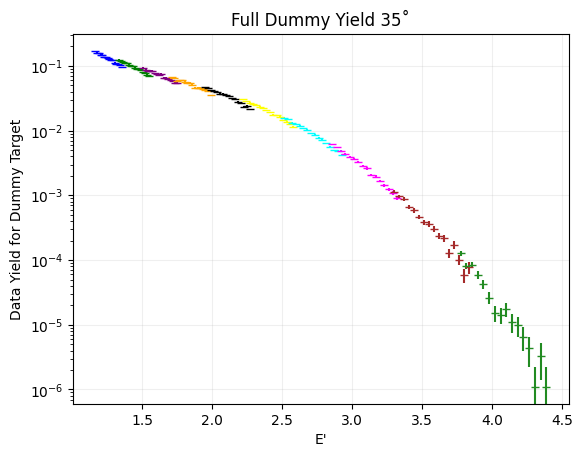

In [88]:
E = 0.2165 # Mean of Ratio of upstream & downstream dummy to target cell thickness
acont_tg = ald + '_' + str(int(dang))
cont_dict_name = f'{acont_tg}_dict' # Dictionary containing the runs for the dummy
cont_dict = globals()[cont_dict_name]
Z, A = 13, 27 # Target
ytar_hist = {}

for momentum in dmom:
    # Get the runs where data for Dummy target was taken
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in cont_dict[momentum]]
    # Grab relevant bracnhes. ytar needed for upstream/downstream differentiation
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_gtr_y']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]
    y_cut = electrons['H_gtr_y'][data_cut]

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts)/np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)
    ytar_hist[momentum] = np.array(y_cut)

dummy_eprime_bin_contents_1, dummy_eprime_bin_errors_1 = datahist_from_array(delta_hist[dmom[0]], dmom[0], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_2, dummy_eprime_bin_errors_2 = datahist_from_array(delta_hist[dmom[1]], dmom[1], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_3, dummy_eprime_bin_errors_3 = datahist_from_array(delta_hist[dmom[2]], dmom[2], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_4, dummy_eprime_bin_errors_4 = datahist_from_array(delta_hist[dmom[3]], dmom[3], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_5, dummy_eprime_bin_errors_5 = datahist_from_array(delta_hist[dmom[4]], dmom[4], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_6, dummy_eprime_bin_errors_6 = datahist_from_array(delta_hist[dmom[5]], dmom[5], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_7, dummy_eprime_bin_errors_7 = datahist_from_array(delta_hist[dmom[6]], dmom[6], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_8, dummy_eprime_bin_errors_8 = datahist_from_array(delta_hist[dmom[7]], dmom[7], hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_9, dummy_eprime_bin_errors_9 = datahist_from_array(delta_hist[dmom[8]], dmom[8], hsdelta_binedges, acont_tg)
if len(dmom) > 9:
    dummy_eprime_bin_contents_10, dummy_eprime_bin_errors_10 = datahist_from_array(delta_hist[dmom[9]], dmom[9], hsdelta_binedges, acont_tg)

plt.errorbar(binned_eprime_bin_centers_1, dummy_eprime_bin_contents_1, yerr = dummy_eprime_bin_errors_1, fmt = '_', label = f'{dmom[0]} GeV', color = rs[1])
plt.errorbar(binned_eprime_bin_centers_2, dummy_eprime_bin_contents_2, yerr = dummy_eprime_bin_errors_2, fmt = '_', label = f'{dmom[1]} GeV', color = rs[2])
plt.errorbar(binned_eprime_bin_centers_3, dummy_eprime_bin_contents_3, yerr = dummy_eprime_bin_errors_3, fmt = '_', label = f'{dmom[2]} GeV', color = rs[3])
plt.errorbar(binned_eprime_bin_centers_4, dummy_eprime_bin_contents_4, yerr = dummy_eprime_bin_errors_4, fmt = '_', label = f'{dmom[3]} GeV', color = rs[4])
plt.errorbar(binned_eprime_bin_centers_5, dummy_eprime_bin_contents_5, yerr = dummy_eprime_bin_errors_5, fmt = '_', label = f'{dmom[4]} GeV', color = rs[5])
plt.errorbar(binned_eprime_bin_centers_6, dummy_eprime_bin_contents_6, yerr = dummy_eprime_bin_errors_6, fmt = '_', label = f'{dmom[5]} GeV', color = rs[6])
plt.errorbar(binned_eprime_bin_centers_7, dummy_eprime_bin_contents_7, yerr = dummy_eprime_bin_errors_7, fmt = '_', label = f'{dmom[6]} GeV', color = rs[7])
plt.errorbar(binned_eprime_bin_centers_8, dummy_eprime_bin_contents_8, yerr = dummy_eprime_bin_errors_8, fmt = '_', label = f'{dmom[7]} GeV', color = rs[8])
plt.errorbar(binned_eprime_bin_centers_9, dummy_eprime_bin_contents_9, yerr = dummy_eprime_bin_errors_9, fmt = '_', label = f'{dmom[8]} GeV', color = rs[9])
if len(dmom) > 9:
    plt.errorbar(binned_eprime_bin_centers_10, dummy_eprime_bin_contents_10, yerr = dummy_eprime_bin_errors_10, fmt = '_', label = f'{dmom[9]} GeV', color = rs[10])
plt.grid(alpha = 0.2)
plt.xlabel('E\'')
plt.ylabel('Data Yield for Dummy Target')
plt.title(f'Full {ald} Yield {idang}˚')
plt.yscale('log')

<h1 align="center">DATA WORK FOR DTG</h1>

In [89]:
# Kinematic variables
Z, A = target_info[dtg][0], target_info[dtg][1]  # Target
thick = target_info[dtg][2] # g/cm2. From Cameron's target sheet column 'R'
thick = thick * 0.996 # Cryo target contraction correction factor
lumin = thick * sim_charge / A * N_A / Q_E * 1e-39
ytar = {}
ytar_hist = {}
delta_hist = {}
eff_weight = {}
dtg_dict_name = f'{adtg}_dict'
dtg_dict = globals()[target_dict_name]
if dang == 35.0:
    jadtg = 'LD235'
elif dang == 26.0:
    jadtg = 'LD2_26'

for momentum in dmom:
    if dang == 35.0:
        files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in LD235_dict[momentum]]
    elif dang == 26.0:
        files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in LD2_26_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons = uproot.concatenate(files, branches)

    data_cut = ((np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & 
                (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1))
    dp_cut = electrons['H_gtr_dp'][data_cut]

    # Cherenkov efficiency correction
    eff_weight[momentum] = 1 / cereff(dp_cut)
    delta_hist[momentum] = np.array(dp_cut)

eprime_bin_contents_1_dtg, eprime_bin_errors_1_dtg = datahist_from_array(delta_hist[dmom[0]], dmom[0], data_delta, jadtg, eff_weight[dmom[0]])
eprime_bin_contents_2_dtg, eprime_bin_errors_2_dtg = datahist_from_array(delta_hist[dmom[1]], dmom[1], data_delta, jadtg, eff_weight[dmom[1]])
eprime_bin_contents_3_dtg, eprime_bin_errors_3_dtg = datahist_from_array(delta_hist[dmom[2]], dmom[2], data_delta, jadtg, eff_weight[dmom[2]])
eprime_bin_contents_4_dtg, eprime_bin_errors_4_dtg = datahist_from_array(delta_hist[dmom[3]], dmom[3], data_delta, jadtg, eff_weight[dmom[3]])
eprime_bin_contents_5_dtg, eprime_bin_errors_5_dtg = datahist_from_array(delta_hist[dmom[4]], dmom[4], data_delta, jadtg, eff_weight[dmom[4]])
eprime_bin_contents_6_dtg, eprime_bin_errors_6_dtg = datahist_from_array(delta_hist[dmom[5]], dmom[5], data_delta, jadtg, eff_weight[dmom[5]])
eprime_bin_contents_7_dtg, eprime_bin_errors_7_dtg = datahist_from_array(delta_hist[dmom[6]], dmom[6], data_delta, jadtg, eff_weight[dmom[6]])
eprime_bin_contents_8_dtg, eprime_bin_errors_8_dtg = datahist_from_array(delta_hist[dmom[7]], dmom[7], data_delta, jadtg, eff_weight[dmom[7]])
eprime_bin_contents_9_dtg, eprime_bin_errors_9_dtg = datahist_from_array(delta_hist[dmom[8]], dmom[8], data_delta, jadtg, eff_weight[dmom[8]])
if len(dmom) > 9:
    eprime_bin_contents_10_dtg, eprime_bin_errors_10_dtg = datahist_from_array(delta_hist[dmom[9]], dmom[9], data_delta, jadtg, eff_weight[dmom[9]])

Mean scaling factor for LD235 at 1.26 GeV/c is 0.00011673099466212143
Total scaling factor for LD235 at 1.26 GeV/c is 8566.705037462467
Scaling factor for LD235 at 1.26 GeV/c is 0.00011673099466212143
Counts for LD235 at 1.26 GeV is 6215.729437662105
Mean scaling factor for LD235 at 1.44 GeV/c is 5.7377214400066456e-05
Total scaling factor for LD235 at 1.44 GeV/c is 17428.52124237739
Scaling factor for LD235 at 1.44 GeV/c is 5.7377214400066456e-05
Counts for LD235 at 1.44 GeV is 8808.284970982184
Mean scaling factor for LD235 at 1.63 GeV/c is 4.413936236876187e-05
Total scaling factor for LD235 at 1.63 GeV/c is 22655.515311832325
Scaling factor for LD235 at 1.63 GeV/c is 4.413936236876187e-05
Counts for LD235 at 1.63 GeV is 8589.1534920948
Mean scaling factor for LD235 at 1.85 GeV/c is 3.6081842520032645e-05
Total scaling factor for LD235 at 1.85 GeV/c is 55429.54185029768
Scaling factor for LD235 at 1.85 GeV/c is 1.8040921260016322e-05
Counts for LD235 at 1.85 GeV is 15742.44546727895

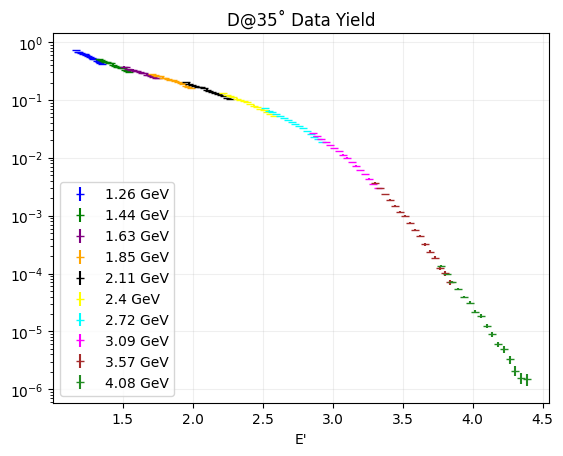

In [90]:
fig3, ax3 = plt.subplots()
ax3.errorbar(binned_eprime_bin_centers_1, eprime_bin_contents_1_dtg, yerr = eprime_bin_errors_1_dtg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax3.errorbar(binned_eprime_bin_centers_2, eprime_bin_contents_2_dtg, yerr = eprime_bin_errors_2_dtg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax3.errorbar(binned_eprime_bin_centers_3, eprime_bin_contents_3_dtg, yerr = eprime_bin_errors_3_dtg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax3.errorbar(binned_eprime_bin_centers_4, eprime_bin_contents_4_dtg, yerr = eprime_bin_errors_4_dtg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax3.errorbar(binned_eprime_bin_centers_5, eprime_bin_contents_5_dtg, yerr = eprime_bin_errors_5_dtg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax3.errorbar(binned_eprime_bin_centers_6, eprime_bin_contents_6_dtg, yerr = eprime_bin_errors_6_dtg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax3.errorbar(binned_eprime_bin_centers_7, eprime_bin_contents_7_dtg, yerr = eprime_bin_errors_7_dtg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax3.errorbar(binned_eprime_bin_centers_8, eprime_bin_contents_8_dtg, yerr = eprime_bin_errors_8_dtg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
ax3.errorbar(binned_eprime_bin_centers_9, eprime_bin_contents_9_dtg, yerr = eprime_bin_errors_9_dtg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax3.errorbar(binned_eprime_bin_centers_10, eprime_bin_contents_10_dtg, yerr = eprime_bin_errors_10_dtg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax3.set_xlabel('E\'')
ax3.legend()
ax3.set_yscale('log')
ax3.set_title(f'D@{idang}˚ Data Yield')
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/data_yield_{dtg}_{idang}_{start_time:.0f}.pdf')

<h2 style="text-align: center; color: silver">Subtracting CSB from full cryo target yield and dummy</h2>

In [91]:
# Calculate the charge symmetric background fraction per bin for full cryo target
csb_frac_1_dtg = csb(binned_eprime_bin_centers_1, dtg, dang)
csb_frac_2_dtg = csb(binned_eprime_bin_centers_2, dtg, dang)
csb_frac_3_dtg = csb(binned_eprime_bin_centers_3, dtg, dang)
csb_frac_4_dtg = csb(binned_eprime_bin_centers_4, dtg, dang)
csb_frac_5_dtg = csb(binned_eprime_bin_centers_5, dtg, dang)
csb_frac_6_dtg = csb(binned_eprime_bin_centers_6, dtg, dang)
csb_frac_7_dtg = csb(binned_eprime_bin_centers_7, dtg, dang)
csb_frac_8_dtg = csb(binned_eprime_bin_centers_8, dtg, dang)
csb_frac_9_dtg = csb(binned_eprime_bin_centers_9, dtg, dang)
if len(dmom) > 9:
    csb_frac_10_dtg = csb(binned_eprime_bin_centers_10, dtg, dang)

# Calculate the charge symmetric background fraction per bin for dummy target
csb_frac_1_ald = csb(binned_eprime_bin_centers_1, ald, dang)
csb_frac_2_ald = csb(binned_eprime_bin_centers_2, ald, dang)
csb_frac_3_ald = csb(binned_eprime_bin_centers_3, ald, dang)
csb_frac_4_ald = csb(binned_eprime_bin_centers_4, ald, dang)
csb_frac_5_ald = csb(binned_eprime_bin_centers_5, ald, dang)
csb_frac_6_ald = csb(binned_eprime_bin_centers_6, ald, dang)
csb_frac_7_ald = csb(binned_eprime_bin_centers_7, ald, dang)
csb_frac_8_ald = csb(binned_eprime_bin_centers_8, ald, dang)
csb_frac_9_ald = csb(binned_eprime_bin_centers_9, ald, dang)
if len(dmom) > 9:
    csb_frac_10_ald = csb(binned_eprime_bin_centers_10, ald, dang)

# Perform CSB subtraction on dummy target
subtracted_bin_contents_1_ald = dummy_eprime_bin_contents_1 * (1 - csb_frac_1_ald)
subtracted_bin_contents_2_ald = dummy_eprime_bin_contents_2 * (1 - csb_frac_2_ald)
subtracted_bin_contents_3_ald = dummy_eprime_bin_contents_3 * (1 - csb_frac_3_ald)
subtracted_bin_contents_4_ald = dummy_eprime_bin_contents_4 * (1 - csb_frac_4_ald)
subtracted_bin_contents_5_ald = dummy_eprime_bin_contents_5 * (1 - csb_frac_5_ald)
subtracted_bin_contents_6_ald = dummy_eprime_bin_contents_6 * (1 - csb_frac_6_ald)
subtracted_bin_contents_7_ald = dummy_eprime_bin_contents_7 * (1 - csb_frac_7_ald)
subtracted_bin_contents_8_ald = dummy_eprime_bin_contents_8 * (1 - csb_frac_8_ald)
subtracted_bin_contents_9_ald = dummy_eprime_bin_contents_9 * (1 - csb_frac_9_ald)
if len(dmom) > 9:
    subtracted_bin_contents_10_ald = dummy_eprime_bin_contents_10 * (1 - csb_frac_10_ald)

subtracted_bin_errors_1_ald = dummy_eprime_bin_errors_1 * (1 - csb_frac_1_ald)
subtracted_bin_errors_2_ald = dummy_eprime_bin_errors_2 * (1 - csb_frac_2_ald)
subtracted_bin_errors_3_ald = dummy_eprime_bin_errors_3 * (1 - csb_frac_3_ald)
subtracted_bin_errors_4_ald = dummy_eprime_bin_errors_4 * (1 - csb_frac_4_ald)
subtracted_bin_errors_5_ald = dummy_eprime_bin_errors_5 * (1 - csb_frac_5_ald)
subtracted_bin_errors_6_ald = dummy_eprime_bin_errors_6 * (1 - csb_frac_6_ald)
subtracted_bin_errors_7_ald = dummy_eprime_bin_errors_7 * (1 - csb_frac_7_ald)
subtracted_bin_errors_8_ald = dummy_eprime_bin_errors_8 * (1 - csb_frac_8_ald)
subtracted_bin_errors_9_ald = dummy_eprime_bin_errors_9 * (1 - csb_frac_9_ald)
if len(dmom) > 9:
    subtracted_bin_errors_10_ald = dummy_eprime_bin_errors_10 * (1 - csb_frac_10_ald)

# Subtract the charge symmetric background fraction from the full cryo yield
subtracted_bin_contents_1_dtg = eprime_bin_contents_1_dtg * (1 - csb_frac_1_dtg)
subtracted_bin_contents_2_dtg = eprime_bin_contents_2_dtg * (1 - csb_frac_2_dtg)
subtracted_bin_contents_3_dtg = eprime_bin_contents_3_dtg * (1 - csb_frac_3_dtg)
subtracted_bin_contents_4_dtg = eprime_bin_contents_4_dtg * (1 - csb_frac_4_dtg)
subtracted_bin_contents_5_dtg = eprime_bin_contents_5_dtg * (1 - csb_frac_5_dtg)
subtracted_bin_contents_6_dtg = eprime_bin_contents_6_dtg * (1 - csb_frac_6_dtg)
subtracted_bin_contents_7_dtg = eprime_bin_contents_7_dtg * (1 - csb_frac_7_dtg)
subtracted_bin_contents_8_dtg = eprime_bin_contents_8_dtg * (1 - csb_frac_8_dtg)
subtracted_bin_contents_9_dtg = eprime_bin_contents_9_dtg * (1 - csb_frac_9_dtg)
if len(dmom) > 9:
    subtracted_bin_contents_10_dtg = eprime_bin_contents_10_dtg * (1 - csb_frac_10_dtg)

subtracted_bin_errors_1_dtg = eprime_bin_errors_1_dtg * (1 - csb_frac_1_dtg)
subtracted_bin_errors_2_dtg = eprime_bin_errors_2_dtg * (1 - csb_frac_2_dtg)
subtracted_bin_errors_3_dtg = eprime_bin_errors_3_dtg * (1 - csb_frac_3_dtg)
subtracted_bin_errors_4_dtg = eprime_bin_errors_4_dtg * (1 - csb_frac_4_dtg)
subtracted_bin_errors_5_dtg = eprime_bin_errors_5_dtg * (1 - csb_frac_5_dtg)
subtracted_bin_errors_6_dtg = eprime_bin_errors_6_dtg * (1 - csb_frac_6_dtg)
subtracted_bin_errors_7_dtg = eprime_bin_errors_7_dtg * (1 - csb_frac_7_dtg)
subtracted_bin_errors_8_dtg = eprime_bin_errors_8_dtg * (1 - csb_frac_8_dtg)
subtracted_bin_errors_9_dtg = eprime_bin_errors_9_dtg * (1 - csb_frac_9_dtg)
if len(dmom) > 9:
    subtracted_bin_errors_10_dtg = eprime_bin_errors_10_dtg * (1 - csb_frac_10_dtg)

# Perform Dummy Subtraction
subtracted_bin_contents_1_dtg = subtracted_bin_contents_1_dtg - (E * subtracted_bin_contents_1_ald)
subtracted_bin_contents_2_dtg = subtracted_bin_contents_2_dtg - (E * subtracted_bin_contents_2_ald)
subtracted_bin_contents_3_dtg = subtracted_bin_contents_3_dtg - (E * subtracted_bin_contents_3_ald)
subtracted_bin_contents_4_dtg = subtracted_bin_contents_4_dtg - (E * subtracted_bin_contents_4_ald)
subtracted_bin_contents_5_dtg = subtracted_bin_contents_5_dtg - (E * subtracted_bin_contents_5_ald)
subtracted_bin_contents_6_dtg = subtracted_bin_contents_6_dtg - (E * subtracted_bin_contents_6_ald)
subtracted_bin_contents_7_dtg = subtracted_bin_contents_7_dtg - (E * subtracted_bin_contents_7_ald)
subtracted_bin_contents_8_dtg = subtracted_bin_contents_8_dtg - (E * subtracted_bin_contents_8_ald)
subtracted_bin_contents_9_dtg = subtracted_bin_contents_9_dtg - (E * subtracted_bin_contents_9_ald)
if len(dmom) > 9:
    subtracted_bin_contents_10_dtg = subtracted_bin_contents_10_dtg - (E * subtracted_bin_contents_10_ald)

# Error Propagation
eprime_bin_errors_1_dtg = np.sqrt((subtracted_bin_errors_1_dtg)**2 + (E * subtracted_bin_errors_1_ald)**2)
eprime_bin_errors_2_dtg = np.sqrt((subtracted_bin_errors_2_dtg)**2 + (E * subtracted_bin_errors_2_ald)**2)
eprime_bin_errors_3_dtg = np.sqrt((subtracted_bin_errors_3_dtg)**2 + (E * subtracted_bin_errors_3_ald)**2)
eprime_bin_errors_4_dtg = np.sqrt((subtracted_bin_errors_4_dtg)**2 + (E * subtracted_bin_errors_4_ald)**2)
eprime_bin_errors_5_dtg = np.sqrt((subtracted_bin_errors_5_dtg)**2 + (E * subtracted_bin_errors_5_ald)**2)
eprime_bin_errors_6_dtg = np.sqrt((subtracted_bin_errors_6_dtg)**2 + (E * subtracted_bin_errors_6_ald)**2)
eprime_bin_errors_7_dtg = np.sqrt((subtracted_bin_errors_7_dtg)**2 + (E * subtracted_bin_errors_7_ald)**2)
eprime_bin_errors_8_dtg = np.sqrt((subtracted_bin_errors_8_dtg)**2 + (E * subtracted_bin_errors_8_ald)**2)
eprime_bin_errors_9_dtg = np.sqrt((subtracted_bin_errors_9_dtg)**2 + (E * subtracted_bin_errors_9_ald)**2)
if len(dmom) > 9:
    eprime_bin_errors_10_dtg = np.sqrt((subtracted_bin_errors_10_dtg)**2 + (E * subtracted_bin_errors_10_ald)**2)

# fig4, ax4 = plt.subplots()
# ax4.errorbar(binned_eprime_bin_centers_1, subtracted_bin_contents_1_dtg, yerr = subtracted_bin_errors_1_dtg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_2, subtracted_bin_contents_2_dtg, yerr = subtracted_bin_errors_2_dtg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_3, subtracted_bin_contents_3_dtg, yerr = subtracted_bin_errors_3_dtg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_4, subtracted_bin_contents_4_dtg, yerr = subtracted_bin_errors_4_dtg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_5, subtracted_bin_contents_5_dtg, yerr = subtracted_bin_errors_5_dtg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_6, subtracted_bin_contents_6_dtg, yerr = subtracted_bin_errors_6_dtg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_7, subtracted_bin_contents_7_dtg, yerr = subtracted_bin_errors_7_dtg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_8, subtracted_bin_contents_8_dtg, yerr = subtracted_bin_errors_8_dtg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
# ax4.errorbar(binned_eprime_bin_centers_9, subtracted_bin_contents_9_dtg, yerr = subtracted_bin_errors_9_dtg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
# if len(dmom) > 9:
#     ax4.errorbar(binned_eprime_bin_centers_10, subtracted_bin_contents_10_dtg, yerr = subtracted_bin_errors_10_dtg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
# ax4.set_xlabel('E\'')
# ax4.set_title('Dummy Subtracted LD2 Data Yield')

<h1 align="center">SIMULATION WORK FOR DTG</h1>


In [92]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_d2cryo22_hms.out")

# If using the old mc files
# dpp_up, dpp_down = 15.0, -15.0 # Momentum acceptance upper and lower limit
# for momentum in dmom:
#     ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
#     ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
#     phi_up, phi_down, theta_up, theta_down = 110.0, -110.0, 65.0, -65.0 # mrad
#     domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
#     sim_charge = 1.
#     wall_exit, wall_ent = 0.0168, 0.02024 # in cm
#     dum_thick_exit, dum_thick_ent = 0.1816, 0.1815 # g/cm2
#     lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # filepath = f"/Volumes/smriti/xem2/worksim_old/hms_mc_{dsimstring}_20degm{mom_str}.root"
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{dsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    # tree = file["h1"]
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the delta correction before applying the cuts
    electrons["hsdeltai"] = (0.990337 * electrons["hsdeltai"]) - 0.00236077 * (electrons["hsdeltai"]**2) + 0.000286814 * (electrons["hsdeltai"]**3) + 2.09878E-6 * (electrons["hsdeltai"]**4) - 2.48674E-6 * (electrons["hsdeltai"]**5) + 1.8646E-7 * (electrons["hsdeltai"]**6) # According to Cameron's log entry
        
    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) < 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)

    delta_weight[momentum] = 1 # Delta correction already applied. No need to apply it as a weight. This is a relic of the old code

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), 1.5)

    # print("Length of ytar_weight", len(ytar_weight))
    # print("Length of Eprime_dict", len(Eprime_dict[momentum]))
    
    # Calculate theta (in degrees)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)
    
    # Perform the interpolation
    points_dtg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))  # Make a column stack of points to be interpolated for our given E' and theta
    xsec_array[momentum] = griddata(points_dtg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation

# Determine hsdelta_min and hsdelta_max based on the delta_dict for the first value in dmom
hsdelta_min, hsdelta_max = np.min(delta_dict[dmom[0]]), np.max(delta_dict[dmom[0]])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_num_bins = bin_per_mom
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, hsdelta_num_bins + 1)

# Update the mchist_from_array function calls with new dmom values
bin_counts_eprime_1_dtg, bin_errors_eprime_1_dtg = mchist_from_array(delta_dict[dmom[0]], xsec_array[dmom[0]] * mc_scale[dmom[0]] * ytar_weight[dmom[0]] * jacobian_weight[dmom[0]] * delta_weight[dmom[0]], hsdelta_binedges)
bin_counts_eprime_2_dtg, bin_errors_eprime_2_dtg = mchist_from_array(delta_dict[dmom[1]], xsec_array[dmom[1]] * mc_scale[dmom[1]] * ytar_weight[dmom[1]] * jacobian_weight[dmom[1]] * delta_weight[dmom[1]], hsdelta_binedges)
bin_counts_eprime_3_dtg, bin_errors_eprime_3_dtg = mchist_from_array(delta_dict[dmom[2]], xsec_array[dmom[2]] * mc_scale[dmom[2]] * ytar_weight[dmom[2]] * jacobian_weight[dmom[2]] * delta_weight[dmom[2]], hsdelta_binedges)
bin_counts_eprime_4_dtg, bin_errors_eprime_4_dtg = mchist_from_array(delta_dict[dmom[3]], xsec_array[dmom[3]] * mc_scale[dmom[3]] * ytar_weight[dmom[3]] * jacobian_weight[dmom[3]] * delta_weight[dmom[3]], hsdelta_binedges)
bin_counts_eprime_5_dtg, bin_errors_eprime_5_dtg = mchist_from_array(delta_dict[dmom[4]], xsec_array[dmom[4]] * mc_scale[dmom[4]] * ytar_weight[dmom[4]] * jacobian_weight[dmom[4]] * delta_weight[dmom[4]], hsdelta_binedges)
bin_counts_eprime_6_dtg, bin_errors_eprime_6_dtg = mchist_from_array(delta_dict[dmom[5]], xsec_array[dmom[5]] * mc_scale[dmom[5]] * ytar_weight[dmom[5]] * jacobian_weight[dmom[5]] * delta_weight[dmom[5]], hsdelta_binedges)
bin_counts_eprime_7_dtg, bin_errors_eprime_7_dtg = mchist_from_array(delta_dict[dmom[6]], xsec_array[dmom[6]] * mc_scale[dmom[6]] * ytar_weight[dmom[6]] * jacobian_weight[dmom[6]] * delta_weight[dmom[6]], hsdelta_binedges)
bin_counts_eprime_8_dtg, bin_errors_eprime_8_dtg = mchist_from_array(delta_dict[dmom[7]], xsec_array[dmom[7]] * mc_scale[dmom[7]] * ytar_weight[dmom[7]] * jacobian_weight[dmom[7]] * delta_weight[dmom[7]], hsdelta_binedges)
bin_counts_eprime_9_dtg, bin_errors_eprime_9_dtg = mchist_from_array(delta_dict[dmom[8]], xsec_array[dmom[8]] * mc_scale[dmom[8]] * ytar_weight[dmom[8]] * jacobian_weight[dmom[8]] * delta_weight[dmom[8]], hsdelta_binedges)
if len(dmom) > 9:
    bin_counts_eprime_10_dtg, bin_errors_eprime_10_dtg = mchist_from_array(delta_dict[dmom[9]], xsec_array[dmom[9]] * mc_scale[dmom[9]] * ytar_weight[dmom[9]] * jacobian_weight[dmom[9]] * delta_weight[dmom[9]], hsdelta_binedges)

Should be -8 and +8 -7.99999939114086 7.999998196195828


Text(0.5, 1.0, 'LD2@35˚')

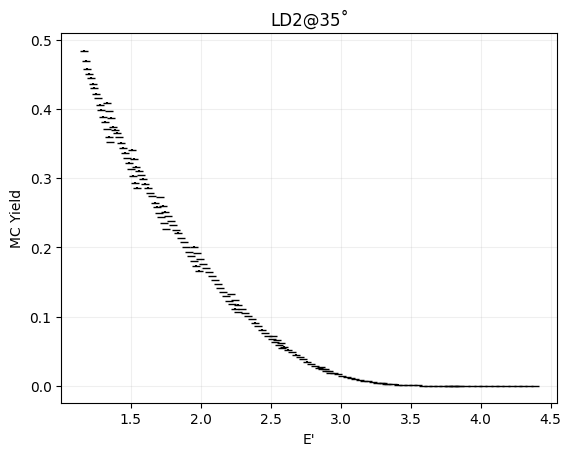

In [93]:
fig4, ax4 = plt.subplots()
ax4.errorbar(binned_eprime_bin_centers_1, bin_counts_eprime_1_dtg, yerr = bin_errors_eprime_1_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[0]} GeV')
ax4.errorbar(binned_eprime_bin_centers_2, bin_counts_eprime_2_dtg, yerr = bin_errors_eprime_2_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[1]} GeV')
ax4.errorbar(binned_eprime_bin_centers_3, bin_counts_eprime_3_dtg, yerr = bin_errors_eprime_3_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[2]} GeV')
ax4.errorbar(binned_eprime_bin_centers_4, bin_counts_eprime_4_dtg, yerr = bin_errors_eprime_4_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[3]} GeV')
ax4.errorbar(binned_eprime_bin_centers_5, bin_counts_eprime_5_dtg, yerr = bin_errors_eprime_5_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[4]} GeV')
ax4.errorbar(binned_eprime_bin_centers_6, bin_counts_eprime_6_dtg, yerr = bin_errors_eprime_6_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[5]} GeV')
ax4.errorbar(binned_eprime_bin_centers_7, bin_counts_eprime_7_dtg, yerr = bin_errors_eprime_7_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[6]} GeV')
ax4.errorbar(binned_eprime_bin_centers_8, bin_counts_eprime_8_dtg, yerr = bin_errors_eprime_8_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[7]} GeV')
ax4.errorbar(binned_eprime_bin_centers_9, bin_counts_eprime_9_dtg, yerr = bin_errors_eprime_9_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[8]} GeV')
if len(dmom) > 9:
    ax4.errorbar(binned_eprime_bin_centers_10, bin_counts_eprime_10_dtg, yerr = bin_errors_eprime_10_dtg, fmt = '_', color = 'black', label = f'Sim {dmom[9]} GeV')
ax4.grid(alpha = 0.2)
ax4.set_xlabel('E\'')
ax4.set_ylabel('MC Yield')
# ax4.set_yscale('log')
# ax4.legend() 
ax4.set_title(f'{dtg}@{idang}˚')
# fig4.savefig(f'{folder}/eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR DTG</h1>

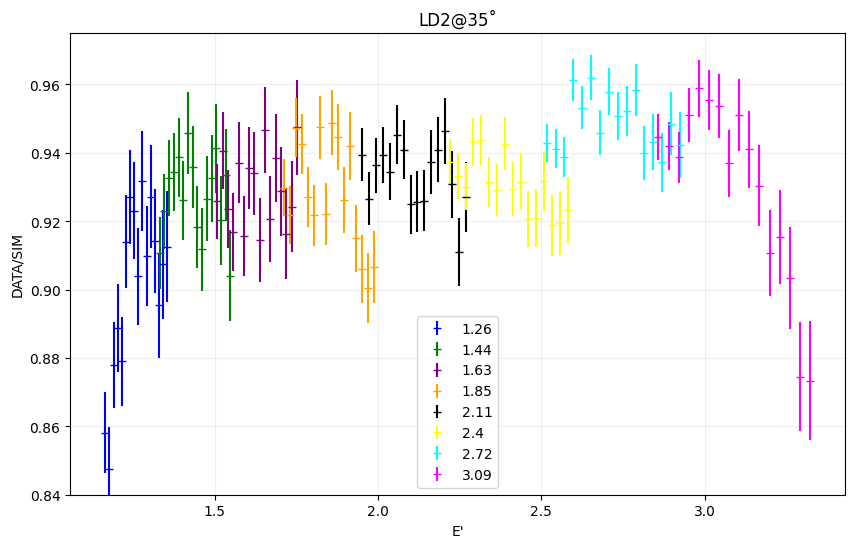

In [117]:
# Calculating the ratio of data to simulation and associated errors for each momentum value
ratio_eprime_1_dtg = subtracted_bin_contents_1_dtg / bin_counts_eprime_1_dtg
ratio_eprime_2_dtg = subtracted_bin_contents_2_dtg / bin_counts_eprime_2_dtg
ratio_eprime_3_dtg = subtracted_bin_contents_3_dtg / bin_counts_eprime_3_dtg
ratio_eprime_4_dtg = subtracted_bin_contents_4_dtg / bin_counts_eprime_4_dtg
ratio_eprime_5_dtg = subtracted_bin_contents_5_dtg / bin_counts_eprime_5_dtg
ratio_eprime_6_dtg = subtracted_bin_contents_6_dtg / bin_counts_eprime_6_dtg
ratio_eprime_7_dtg = subtracted_bin_contents_7_dtg / bin_counts_eprime_7_dtg
ratio_eprime_8_dtg = subtracted_bin_contents_8_dtg / bin_counts_eprime_8_dtg
ratio_eprime_9_dtg = subtracted_bin_contents_9_dtg / bin_counts_eprime_9_dtg
if len(dmom) > 9:
    ratio_eprime_10_dtg = subtracted_bin_contents_10_dtg / bin_counts_eprime_10_dtg

# Add errors in quadrature for each momentum value
ratio_errors_1_dtg = ratio_eprime_1_dtg * np.sqrt((subtracted_bin_errors_1_dtg / subtracted_bin_contents_1_dtg)**2 + (bin_errors_eprime_1_dtg / bin_counts_eprime_1_dtg)**2)
ratio_errors_2_dtg = ratio_eprime_2_dtg * np.sqrt((subtracted_bin_errors_2_dtg / subtracted_bin_contents_2_dtg)**2 + (bin_errors_eprime_2_dtg / bin_counts_eprime_2_dtg)**2)
ratio_errors_3_dtg = ratio_eprime_3_dtg * np.sqrt((subtracted_bin_errors_3_dtg / subtracted_bin_contents_3_dtg)**2 + (bin_errors_eprime_3_dtg / bin_counts_eprime_3_dtg)**2)
ratio_errors_4_dtg = ratio_eprime_4_dtg * np.sqrt((subtracted_bin_errors_4_dtg / subtracted_bin_contents_4_dtg)**2 + (bin_errors_eprime_4_dtg / bin_counts_eprime_4_dtg)**2)
ratio_errors_5_dtg = ratio_eprime_5_dtg * np.sqrt((subtracted_bin_errors_5_dtg / subtracted_bin_contents_5_dtg)**2 + (bin_errors_eprime_5_dtg / bin_counts_eprime_5_dtg)**2)
ratio_errors_6_dtg = ratio_eprime_6_dtg * np.sqrt((subtracted_bin_errors_6_dtg / subtracted_bin_contents_6_dtg)**2 + (bin_errors_eprime_6_dtg / bin_counts_eprime_6_dtg)**2)
ratio_errors_7_dtg = ratio_eprime_7_dtg * np.sqrt((subtracted_bin_errors_7_dtg / subtracted_bin_contents_7_dtg)**2 + (bin_errors_eprime_7_dtg / bin_counts_eprime_7_dtg)**2)
ratio_errors_8_dtg = ratio_eprime_8_dtg * np.sqrt((subtracted_bin_errors_8_dtg / subtracted_bin_contents_8_dtg)**2 + (bin_errors_eprime_8_dtg / bin_counts_eprime_8_dtg)**2)
ratio_errors_9_dtg = ratio_eprime_9_dtg * np.sqrt((subtracted_bin_errors_9_dtg / subtracted_bin_contents_9_dtg)**2 + (bin_errors_eprime_9_dtg / bin_counts_eprime_9_dtg)**2)
if len(dmom) > 9:
    ratio_errors_10_dtg = ratio_eprime_10_dtg * np.sqrt((subtracted_bin_errors_10_dtg / subtracted_bin_contents_10_dtg)**2 + (bin_errors_eprime_10_dtg / bin_counts_eprime_10_dtg)**2)

# Plotting the ratio with error bars for the updated momentum values
fig5, ax5 = plt.subplots(figsize = (10, 6))
ax5.errorbar(binned_eprime_bin_centers_1, ratio_eprime_1_dtg, yerr = ratio_errors_1_dtg, fmt = '_', color = rs[1], label = f'{dmom[0]}')
ax5.errorbar(binned_eprime_bin_centers_2, ratio_eprime_2_dtg, yerr = ratio_errors_2_dtg, fmt = '_', color = rs[2], label = f'{dmom[1]}')
ax5.errorbar(binned_eprime_bin_centers_3, ratio_eprime_3_dtg, yerr = ratio_errors_3_dtg, fmt = '_', color = rs[3], label = f'{dmom[2]}')
ax5.errorbar(binned_eprime_bin_centers_4, ratio_eprime_4_dtg, yerr = ratio_errors_4_dtg, fmt = '_', color = rs[4], label = f'{dmom[3]}')
ax5.errorbar(binned_eprime_bin_centers_5, ratio_eprime_5_dtg, yerr = ratio_errors_5_dtg, fmt = '_', color = rs[5], label = f'{dmom[4]}')
ax5.errorbar(binned_eprime_bin_centers_6, ratio_eprime_6_dtg, yerr = ratio_errors_6_dtg, fmt = '_', color = rs[6], label = f'{dmom[5]}')
ax5.errorbar(binned_eprime_bin_centers_7, ratio_eprime_7_dtg, yerr = ratio_errors_7_dtg, fmt = '_', color = rs[7], label = f'{dmom[6]}')
ax5.errorbar(binned_eprime_bin_centers_8, ratio_eprime_8_dtg, yerr = ratio_errors_8_dtg, fmt = '_', color = rs[8], label = f'{dmom[7]}')
# ax5.errorbar(binned_eprime_bin_centers_9, ratio_eprime_9_dtg, yerr = ratio_errors_9_dtg, fmt = '_', color = rs[9], label = f'{dmom[8]}')
# if len(dmom) > 9:
#     ax5.errorbar(binned_eprime_bin_centers_10, ratio_eprime_10_dtg, yerr = ratio_errors_10_dtg, fmt = '_', color = rs[10], label = f'{dmom[9]}')

# ax5.spines['top'].set_visible(False)
# ax5.spines['right'].set_visible(False)
ax5.set_xlabel('E\'')
ax5.set_ylabel('DATA/SIM')
ax5.set_title(f'{dtg}@{idang}˚')
ax5.legend()
ax5.set_ylim(0.84)
ax5.grid(alpha = 0.2)
fig5.savefig(f'{folder}/ratio_eprime_{dtg}_{idang}_{start_time:.0f}.png', dpi = 300)

In [95]:
DATAMCLD2 = np.concatenate((ratio_eprime_1_dtg, ratio_eprime_2_dtg, ratio_eprime_3_dtg, ratio_eprime_4_dtg, ratio_eprime_5_dtg, ratio_eprime_6_dtg, ratio_eprime_7_dtg, ratio_eprime_8_dtg))
DATAMC_LD2_ERR = np.concatenate((ratio_errors_1_dtg, ratio_errors_2_dtg, ratio_errors_3_dtg, ratio_errors_4_dtg, ratio_errors_5_dtg, ratio_errors_6_dtg, ratio_errors_7_dtg, ratio_errors_8_dtg))

<h1 align="center">BORN CROSS SECTION CALCULATION FOR DTG</h1>

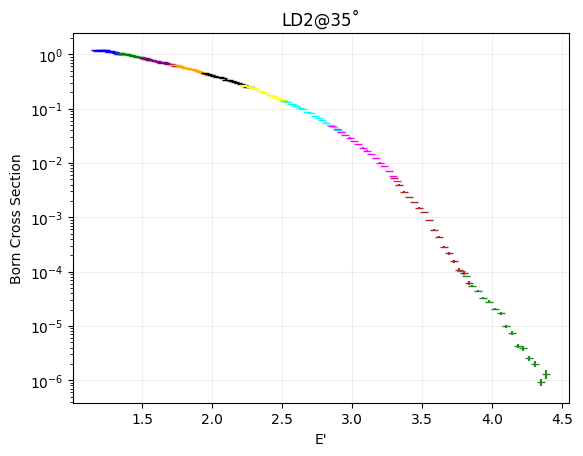

In [96]:
# Interpolate again to get model Born cross-section
born_xsec_array_1_dtg = griddata(points_dtg, V6, points_to_interpolate_1, method = 'linear')
born_xsec_array_2_dtg = griddata(points_dtg, V6, points_to_interpolate_2, method = 'linear')
born_xsec_array_3_dtg = griddata(points_dtg, V6, points_to_interpolate_3, method = 'linear')
born_xsec_array_4_dtg = griddata(points_dtg, V6, points_to_interpolate_4, method = 'linear')
born_xsec_array_5_dtg = griddata(points_dtg, V6, points_to_interpolate_5, method = 'linear')
born_xsec_array_6_dtg = griddata(points_dtg, V6, points_to_interpolate_6, method = 'linear')
born_xsec_array_7_dtg = griddata(points_dtg, V6, points_to_interpolate_7, method = 'linear')
born_xsec_array_8_dtg = griddata(points_dtg, V6, points_to_interpolate_8, method = 'linear')
born_xsec_array_9_dtg = griddata(points_dtg, V6, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    born_xsec_array_10_dtg = griddata(points_dtg, V6, points_to_interpolate_10, method = 'linear')

# Get the QE piece
qe_array_1_dtg = griddata(points_dtg, V8, points_to_interpolate_1, method = 'linear')
qe_array_2_dtg = griddata(points_dtg, V8, points_to_interpolate_2, method = 'linear')
qe_array_3_dtg = griddata(points_dtg, V8, points_to_interpolate_3, method = 'linear')
qe_array_4_dtg = griddata(points_dtg, V8, points_to_interpolate_4, method = 'linear')
qe_array_5_dtg = griddata(points_dtg, V8, points_to_interpolate_5, method = 'linear')
qe_array_6_dtg = griddata(points_dtg, V8, points_to_interpolate_6, method = 'linear')
qe_array_7_dtg = griddata(points_dtg, V8, points_to_interpolate_7, method = 'linear')
qe_array_8_dtg = griddata(points_dtg, V8, points_to_interpolate_8, method = 'linear')
qe_array_9_dtg = griddata(points_dtg, V8, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    qe_array_10_dtg = griddata(points_dtg, V8, points_to_interpolate_10, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_1_dtg = griddata(points_dtg, V13, points_to_interpolate_1, method = 'linear')
ccf_2_dtg = griddata(points_dtg, V13, points_to_interpolate_2, method = 'linear')
ccf_3_dtg = griddata(points_dtg, V13, points_to_interpolate_3, method = 'linear')
ccf_4_dtg = griddata(points_dtg, V13, points_to_interpolate_4, method = 'linear')
ccf_5_dtg = griddata(points_dtg, V13, points_to_interpolate_5, method = 'linear')
ccf_6_dtg = griddata(points_dtg, V13, points_to_interpolate_6, method = 'linear')
ccf_7_dtg = griddata(points_dtg, V13, points_to_interpolate_7, method = 'linear')
ccf_8_dtg = griddata(points_dtg, V13, points_to_interpolate_8, method = 'linear')
ccf_9_dtg = griddata(points_dtg, V13, points_to_interpolate_9, method = 'linear')
if len(dmom) > 9:
    ccf_10_dtg = griddata(points_dtg, V13, points_to_interpolate_10, method = 'linear')

# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_1_dtg = ratio_eprime_1_dtg * born_xsec_array_1_dtg * ccf_1_dtg
born_cross_2_dtg = ratio_eprime_2_dtg * born_xsec_array_2_dtg * ccf_2_dtg
born_cross_3_dtg = ratio_eprime_3_dtg * born_xsec_array_3_dtg * ccf_3_dtg
born_cross_4_dtg = ratio_eprime_4_dtg * born_xsec_array_4_dtg * ccf_4_dtg
born_cross_5_dtg = ratio_eprime_5_dtg * born_xsec_array_5_dtg * ccf_5_dtg
born_cross_6_dtg = ratio_eprime_6_dtg * born_xsec_array_6_dtg * ccf_6_dtg
born_cross_7_dtg = ratio_eprime_7_dtg * born_xsec_array_7_dtg * ccf_7_dtg
born_cross_8_dtg = ratio_eprime_8_dtg * born_xsec_array_8_dtg * ccf_8_dtg
born_cross_9_dtg = ratio_eprime_9_dtg * born_xsec_array_9_dtg * ccf_9_dtg
if len(dmom) > 9:
    born_cross_10_dtg = ratio_eprime_10_dtg * born_xsec_array_10_dtg * ccf_10_dtg

# Error propagation
born_errors_1_dtg = born_cross_1_dtg * ratio_errors_1_dtg
born_errors_2_dtg = born_cross_2_dtg * ratio_errors_2_dtg
born_errors_3_dtg = born_cross_3_dtg * ratio_errors_3_dtg
born_errors_4_dtg = born_cross_4_dtg * ratio_errors_4_dtg
born_errors_5_dtg = born_cross_5_dtg * ratio_errors_5_dtg
born_errors_6_dtg = born_cross_6_dtg * ratio_errors_6_dtg
born_errors_7_dtg = born_cross_7_dtg * ratio_errors_7_dtg
born_errors_8_dtg = born_cross_8_dtg * ratio_errors_8_dtg
born_errors_9_dtg = born_cross_9_dtg * ratio_errors_9_dtg
if len(dmom) > 9:
    born_errors_10_dtg = born_cross_10_dtg * ratio_errors_10_dtg

fig6, ax6 = plt.subplots()
ax6.errorbar(binned_eprime_bin_centers_1, born_cross_1_dtg, yerr = born_errors_1_dtg, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax6.errorbar(binned_eprime_bin_centers_2, born_cross_2_dtg, yerr = born_errors_2_dtg, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax6.errorbar(binned_eprime_bin_centers_3, born_cross_3_dtg, yerr = born_errors_3_dtg, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax6.errorbar(binned_eprime_bin_centers_4, born_cross_4_dtg, yerr = born_errors_4_dtg, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax6.errorbar(binned_eprime_bin_centers_5, born_cross_5_dtg, yerr = born_errors_5_dtg, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax6.errorbar(binned_eprime_bin_centers_6, born_cross_6_dtg, yerr = born_errors_6_dtg, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax6.errorbar(binned_eprime_bin_centers_7, born_cross_7_dtg, yerr = born_errors_7_dtg, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax6.errorbar(binned_eprime_bin_centers_8, born_cross_8_dtg, yerr = born_errors_8_dtg, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
ax6.errorbar(binned_eprime_bin_centers_9, born_cross_9_dtg, yerr = born_errors_9_dtg, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax6.errorbar(binned_eprime_bin_centers_10, born_cross_10_dtg, yerr = born_errors_10_dtg, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax6.set_xlabel('E\'')
ax6.set_ylabel('Born Cross Section')
ax6.set_title(f'{dtg}@{idang}˚')
ax6.set_yscale('log')
#ax6.legend()
ax6.grid(alpha = 0.2)
# fig6.savefig(f'{folder}/xsec_{dtg}_{idang}_{start_time:.0f}.pdf')

<h1 align="center">TAKING CROSS-SECTION RATIOS</h1>

Per-nucleon scaling factor: 6.0


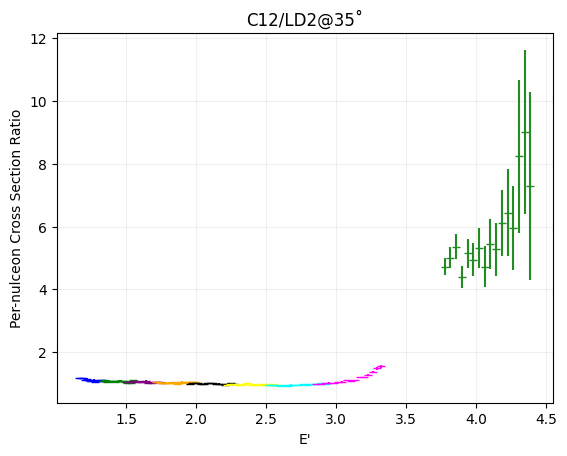

In [97]:
nA = target_info[ntg][1]
nZ = target_info[ntg][0]
dA = target_info[dtg][1]

sf = nA / dA
print("Per-nucleon scaling factor:", sf)

csr_1 = born_cross_1_ntg / born_cross_1_dtg / sf
csr_2 = born_cross_2_ntg / born_cross_2_dtg / sf
csr_3 = born_cross_3_ntg / born_cross_3_dtg / sf
csr_4 = born_cross_4_ntg / born_cross_4_dtg / sf
csr_5 = born_cross_5_ntg / born_cross_5_dtg / sf
csr_6 = born_cross_6_ntg / born_cross_6_dtg / sf
csr_7 = born_cross_7_ntg / born_cross_7_dtg / sf
csr_8 = born_cross_8_ntg / born_cross_8_dtg / sf
csr_9 = born_cross_9_ntg / born_cross_9_dtg / sf
if len(dmom) > 9:
    csr_10 = born_cross_10_ntg / born_cross_10_dtg / sf

csr_errors_1 = csr_1 * np.sqrt((born_errors_1_ntg / born_cross_1_ntg)**2 + (born_errors_1_dtg / born_cross_1_dtg)**2)
csr_errors_2 = csr_2 * np.sqrt((born_errors_2_ntg / born_cross_2_ntg)**2 + (born_errors_2_dtg / born_cross_2_dtg)**2)
csr_errors_3 = csr_3 * np.sqrt((born_errors_3_ntg / born_cross_3_ntg)**2 + (born_errors_3_dtg / born_cross_3_dtg)**2)
csr_errors_4 = csr_4 * np.sqrt((born_errors_4_ntg / born_cross_4_ntg)**2 + (born_errors_4_dtg / born_cross_4_dtg)**2)
csr_errors_5 = csr_5 * np.sqrt((born_errors_5_ntg / born_cross_5_ntg)**2 + (born_errors_5_dtg / born_cross_5_dtg)**2)
csr_errors_6 = csr_6 * np.sqrt((born_errors_6_ntg / born_cross_6_ntg)**2 + (born_errors_6_dtg / born_cross_6_dtg)**2)
csr_errors_7 = csr_7 * np.sqrt((born_errors_7_ntg / born_cross_7_ntg)**2 + (born_errors_7_dtg / born_cross_7_dtg)**2)
csr_errors_8 = csr_8 * np.sqrt((born_errors_8_ntg / born_cross_8_ntg)**2 + (born_errors_8_dtg / born_cross_8_dtg)**2)
csr_errors_9 = csr_9 * np.sqrt((born_errors_9_ntg / born_cross_9_ntg)**2 + (born_errors_9_dtg / born_cross_9_dtg)**2)
if len(dmom) > 9:
    csr_errors_10 = csr_10 * np.sqrt((born_errors_10_ntg / born_cross_10_ntg)**2 + (born_errors_10_dtg / born_cross_10_dtg)**2)

fig7, ax7 = plt.subplots()
ax7.errorbar(binned_eprime_bin_centers_1, csr_1, yerr = csr_errors_1, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax7.errorbar(binned_eprime_bin_centers_2, csr_2, yerr = csr_errors_2, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax7.errorbar(binned_eprime_bin_centers_3, csr_3, yerr = csr_errors_3, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax7.errorbar(binned_eprime_bin_centers_4, csr_4, yerr = csr_errors_4, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax7.errorbar(binned_eprime_bin_centers_5, csr_5, yerr = csr_errors_5, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax7.errorbar(binned_eprime_bin_centers_6, csr_6, yerr = csr_errors_6, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax7.errorbar(binned_eprime_bin_centers_7, csr_7, yerr = csr_errors_7, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax7.errorbar(binned_eprime_bin_centers_8, csr_8, yerr = csr_errors_8, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
# ax7.errorbar(binned_eprime_bin_centers_9, csr_9, yerr = csr_errors_9, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax7.errorbar(binned_eprime_bin_centers_10, csr_10, yerr = csr_errors_10, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax7.set_xlabel('E\'')
ax7.set_ylabel('Per-nulceon Cross Section Ratio')
ax7.set_title(f'{ntg}/{dtg}@{idang}˚')
ax7.grid(alpha = 0.2)
# ax7.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.0))

<h1 align="center">Converting to Bjorken-x</h1>

absolute value of slope 0.3682698946922839
EMC Ratio at x = 0.3: 1.0756125003966026


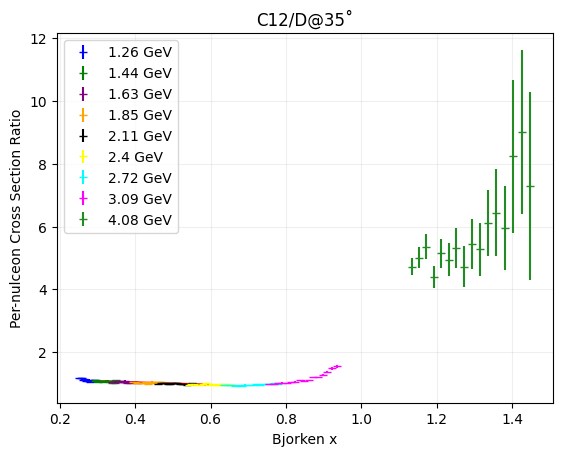

In [98]:
bin_centers_bjx_1 = (4 * Ei * binned_eprime_bin_centers_1 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_1))
bin_centers_bjx_2 = (4 * Ei * binned_eprime_bin_centers_2 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2))
bin_centers_bjx_3 = (4 * Ei * binned_eprime_bin_centers_3 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3))
bin_centers_bjx_4 = (4 * Ei * binned_eprime_bin_centers_4 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4))
bin_centers_bjx_5 = (4 * Ei * binned_eprime_bin_centers_5 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5))
bin_centers_bjx_6 = (4 * Ei * binned_eprime_bin_centers_6 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_6))
bin_centers_bjx_7 = (4 * Ei * binned_eprime_bin_centers_7 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_7))
bin_centers_bjx_8 = (4 * Ei * binned_eprime_bin_centers_8 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_8))
bin_centers_bjx_9 = (4 * Ei * binned_eprime_bin_centers_9 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_9))
if len(dmom) > 9:
    bin_centers_bjx_10 = (4 * Ei * binned_eprime_bin_centers_10 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_10))

fig8, ax8 = plt.subplots()
ax8.errorbar(bin_centers_bjx_1, csr_1, yerr = csr_errors_1, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax8.errorbar(bin_centers_bjx_2, csr_2, yerr = csr_errors_2, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax8.errorbar(bin_centers_bjx_3, csr_3, yerr = csr_errors_3, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax8.errorbar(bin_centers_bjx_4, csr_4, yerr = csr_errors_4, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax8.errorbar(bin_centers_bjx_5, csr_5, yerr = csr_errors_5, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax8.errorbar(bin_centers_bjx_6, csr_6, yerr = csr_errors_6, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax8.errorbar(bin_centers_bjx_7, csr_7, yerr = csr_errors_7, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
ax8.errorbar(bin_centers_bjx_8, csr_8, yerr = csr_errors_8, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
# ax8.errorbar(bin_centers_bjx_9, csr_9, yerr = csr_errors_9, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    ax8.errorbar(bin_centers_bjx_10, csr_10, yerr = csr_errors_10, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax8.set_xlabel('Bjorken x')
ax8.set_ylabel('Per-nulceon Cross Section Ratio')
ax8.set_title(f'{ntg}/D@{idang}˚')
ax8.legend()
ax8.grid(alpha = 0.2)

if len(dmom) > 9:
    all_eprime_bin_centers = np.concatenate((binned_eprime_bin_centers_1, binned_eprime_bin_centers_2, binned_eprime_bin_centers_3, binned_eprime_bin_centers_4, binned_eprime_bin_centers_5, binned_eprime_bin_centers_6, binned_eprime_bin_centers_7, binned_eprime_bin_centers_8, binned_eprime_bin_centers_9, binned_eprime_bin_centers_10))
    all_bjx = np.concatenate((bin_centers_bjx_1, bin_centers_bjx_2, bin_centers_bjx_3, bin_centers_bjx_4, bin_centers_bjx_5, bin_centers_bjx_6, bin_centers_bjx_7, bin_centers_bjx_8, bin_centers_bjx_9, bin_centers_bjx_10))
    csr = np.concatenate((csr_1, csr_2, csr_3, csr_4, csr_5, csr_6, csr_7, csr_8, csr_9, csr_10))
else:
    all_eprime_bin_centers = np.concatenate((binned_eprime_bin_centers_1, binned_eprime_bin_centers_2, binned_eprime_bin_centers_3, binned_eprime_bin_centers_4, binned_eprime_bin_centers_5, binned_eprime_bin_centers_6, binned_eprime_bin_centers_7, binned_eprime_bin_centers_8, binned_eprime_bin_centers_9))
    all_bjx = np.concatenate((bin_centers_bjx_1, bin_centers_bjx_2, bin_centers_bjx_3, bin_centers_bjx_4, bin_centers_bjx_5, bin_centers_bjx_6, bin_centers_bjx_7, bin_centers_bjx_8, bin_centers_bjx_9))
    csr = np.concatenate((csr_1, csr_2, csr_3, csr_4, csr_5, csr_6, csr_7, csr_8, csr_9))

mask = (all_bjx >= 0.3) & (all_bjx <= 0.6) & ~np.isnan(csr)
filtered_bin_centers = all_bjx[mask]
filtered_csr = csr[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("absolute value of slope", abs(slope))
print("EMC Ratio at x = 0.3:", slope * np.min(filtered_bin_centers) + intercept)
_  = ax8.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig8.savefig(f'{folder}/emc_{ntg}_{dtg}_{dang}_{time.time():.0f}.png', dpi = 300)

# Calculating isoscalar correction factor

In [99]:
isoscalar_all = np.zeros(len(all_eprime_bin_centers))
q2_all = 4 * Ei * all_eprime_bin_centers * (np.sin(dang * np.pi / 180 / 2))**2
print(f"The minimum and maximum Q^2 values are {np.min(q2_all):.2f} and {np.max(q2_all):.2f}")

for i in range(len(all_eprime_bin_centers)):
    isoscalar_all[i] = jra_nprat(all_bjx[i], q2_all[i])

print("Average of q2_all", np.mean(q2_all))
print("Average of Bjorken x", np.mean(all_bjx))
print("Length and average of isoscalar_all", len(isoscalar_all), np.mean(isoscalar_all))
# print(isoscalar_all)

The minimum and maximum Q^2 values are 4.44 and 16.72
Average of q2_all 9.206643898927146
Average of Bjorken x 0.6389658491264674
Length and average of isoscalar_all 160 0.5878324593062965


\begin{equation}
    \text{isoscalar all} = \frac{\sigma_n}{\sigma_p}
\end{equation}

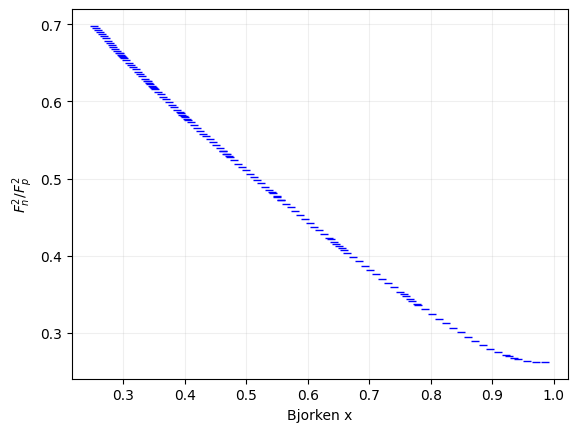

In [100]:
a = plt.plot(all_bjx[isoscalar_all != 1], isoscalar_all[isoscalar_all != 1], '_', color = 'blue')
plt.xlabel('Bjorken x')
plt.ylabel(r'$F^2_n/F^2_p$')
plt.grid(alpha = 0.2)

# Calculating and Plotting the final Cross-Section Ratios

\begin{equation}
    \left( \frac{\sigma_A}{\sigma_D} \right)_{\text{ISO}} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right) \frac{\sigma_A}{\sigma_D},
\end{equation}

\begin{equation}
    \text{isoscalar factor} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right)
\end{equation}

nN 6
nZ 6
nA 12
Mean of isoscalar_factor 1.0
Length of iso_9 16


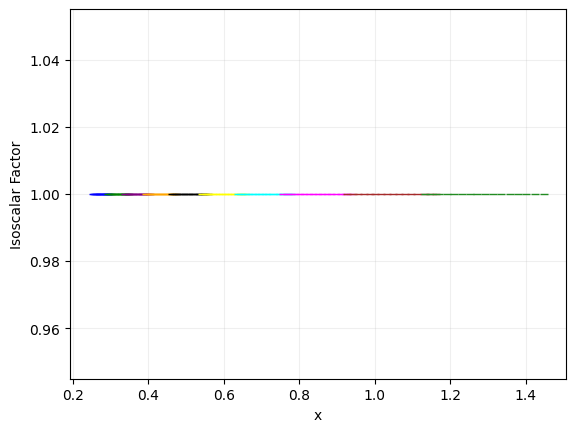

In [101]:
nN = nA - nZ
print("nN", nN)
print("nZ", nZ)
print("nA", nA)

isoscalar_factor = (nA/2 * (1 + isoscalar_all)) / (nZ + (nN * isoscalar_all))
isoscalar_factor_1 = isoscalar_factor[0:len(binned_eprime_bin_centers_1)]
isoscalar_factor_2 = isoscalar_factor[len(binned_eprime_bin_centers_1):2 * len(binned_eprime_bin_centers_2)]
isoscalar_factor_3 = isoscalar_factor[2 * len(binned_eprime_bin_centers_2):3 * len(binned_eprime_bin_centers_3)]
isoscalar_factor_4 = isoscalar_factor[3 * len(binned_eprime_bin_centers_3):4 * len(binned_eprime_bin_centers_4)]
isoscalar_factor_5 = isoscalar_factor[4 * len(binned_eprime_bin_centers_4):5 * len(binned_eprime_bin_centers_5)]
isoscalar_factor_6 = isoscalar_factor[5 * len(binned_eprime_bin_centers_5):6 * len(binned_eprime_bin_centers_6)]
isoscalar_factor_7 = isoscalar_factor[6 * len(binned_eprime_bin_centers_6):7 * len(binned_eprime_bin_centers_7)]
isoscalar_factor_8 = isoscalar_factor[7 * len(binned_eprime_bin_centers_7):8 * len(binned_eprime_bin_centers_8)]
isoscalar_factor_9 = isoscalar_factor[8 * len(binned_eprime_bin_centers_8):9 * len(binned_eprime_bin_centers_9)]
if len(dmom) > 9:
    isoscalar_factor_10 = isoscalar_factor[9 * len(binned_eprime_bin_centers_9):]
print("Mean of isoscalar_factor", np.mean(isoscalar_factor))
print(f'Length of iso_9 {len(isoscalar_factor_8)}')

# Apply isoscalar correction to cross-section ratios
iso_csr_1 = csr_1 * isoscalar_factor_1
iso_csr_2 = csr_2 * isoscalar_factor_2
iso_csr_3 = csr_3 * isoscalar_factor_3
iso_csr_4 = csr_4 * isoscalar_factor_4
iso_csr_5 = csr_5 * isoscalar_factor_5
iso_csr_6 = csr_6 * isoscalar_factor_6
iso_csr_7 = csr_7 * isoscalar_factor_7
iso_csr_8 = csr_8 * isoscalar_factor_8
iso_csr_9 = csr_9 * isoscalar_factor_9
if len(dmom) > 9:
    iso_csr_10 = csr_10 * isoscalar_factor_10

plt.plot(bin_centers_bjx_1, isoscalar_factor_1, '_', color = rs[1], label = f'{dmom[0]} GeV')
plt.plot(bin_centers_bjx_2, isoscalar_factor_2, '_', color = rs[2], label = f'{dmom[1]} GeV')
plt.plot(bin_centers_bjx_3, isoscalar_factor_3, '_', color = rs[3], label = f'{dmom[2]} GeV')
plt.plot(bin_centers_bjx_4, isoscalar_factor_4, '_', color = rs[4], label = f'{dmom[3]} GeV')
plt.plot(bin_centers_bjx_5, isoscalar_factor_5, '_', color = rs[5], label = f'{dmom[4]} GeV')
plt.plot(bin_centers_bjx_6, isoscalar_factor_6, '_', color = rs[6], label = f'{dmom[5]} GeV')
plt.plot(bin_centers_bjx_7, isoscalar_factor_7, '_', color = rs[7], label = f'{dmom[6]} GeV')
plt.plot(bin_centers_bjx_8, isoscalar_factor_8, '_', color = rs[8], label = f'{dmom[7]} GeV')
plt.plot(bin_centers_bjx_9, isoscalar_factor_9, '_', color = rs[9], label = f'{dmom[8]} GeV')
if len(dmom) > 9:
    plt.plot(bin_centers_bjx_10, isoscalar_factor_10, '_', color = rs[10], label = f'{dmom[9]} GeV')
plt.grid(alpha = 0.2)
plt.xlabel('x')
_ = plt.ylabel('Isoscalar Factor')

Value of isoscalar corrected slope -0.36826989469228416


Text(0.4, 0.79, 'Slope: 0.3683$\\pm$0.0282 \n')

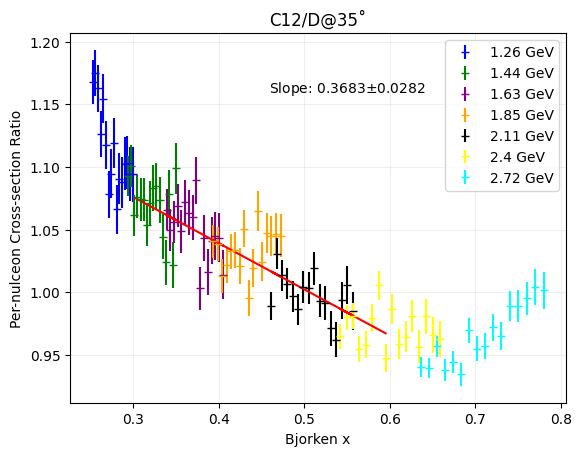

In [105]:
fig9, ax9 = plt.subplots()
ax9.errorbar(bin_centers_bjx_1, iso_csr_1, yerr = isoscalar_factor_1 * csr_errors_1, fmt = '_', color = rs[1], label = f'{dmom[0]} GeV')
ax9.errorbar(bin_centers_bjx_2, iso_csr_2, yerr = isoscalar_factor_2 * csr_errors_2, fmt = '_', color = rs[2], label = f'{dmom[1]} GeV')
ax9.errorbar(bin_centers_bjx_3, iso_csr_3, yerr = isoscalar_factor_3 * csr_errors_3, fmt = '_', color = rs[3], label = f'{dmom[2]} GeV')
ax9.errorbar(bin_centers_bjx_4, iso_csr_4, yerr = isoscalar_factor_4 * csr_errors_4, fmt = '_', color = rs[4], label = f'{dmom[3]} GeV')
ax9.errorbar(bin_centers_bjx_5, iso_csr_5, yerr = isoscalar_factor_5 * csr_errors_5, fmt = '_', color = rs[5], label = f'{dmom[4]} GeV')
ax9.errorbar(bin_centers_bjx_6, iso_csr_6, yerr = isoscalar_factor_6 * csr_errors_6, fmt = '_', color = rs[6], label = f'{dmom[5]} GeV')
ax9.errorbar(bin_centers_bjx_7, iso_csr_7, yerr = isoscalar_factor_7 * csr_errors_7, fmt = '_', color = rs[7], label = f'{dmom[6]} GeV')
# ax9.errorbar(bin_centers_bjx_8, iso_csr_8, yerr = isoscalar_factor_8 * csr_errors_8, fmt = '_', color = rs[8], label = f'{dmom[7]} GeV')
# ax9.errorbar(bin_centers_bjx_9, iso_csr_9, yerr = isoscalar_factor_9 * csr_errors_9, fmt = '_', color = rs[9], label = f'{dmom[8]} GeV')
# if len(dmom) > 9:
#     ax9.errorbar(bin_centers_bjx_10, iso_csr_10, yerr = isoscalar_factor_10 * csr_errors_10, fmt = '_', color = rs[10], label = f'{dmom[9]} GeV')
ax9.set_xlabel('Bjorken x')
# ax9.set_ylabel(fr'$\sigma_{ntg}$/{nA}/$\sigma_D$/2@{dang}˚')
if nZ != nN:
    ax9.set_ylabel('Isoscalar Corrected Per-nulceon Cross-section Ratio')
else:
    ax9.set_ylabel('Per-nulceon Cross-section Ratio')
ax9.set_title(f'{ntg}/D@{idang}˚')
ax9.grid(alpha = 0.2)
ax9.legend()

if len(dmom) > 9:
    iso_csr = np.concatenate((iso_csr_1, iso_csr_2, iso_csr_3, iso_csr_4, iso_csr_5, iso_csr_6, iso_csr_7, iso_csr_8, iso_csr_9, iso_csr_10))
    bin_errors = np.concatenate((isoscalar_factor_1 * csr_errors_1, isoscalar_factor_2 * csr_errors_2, isoscalar_factor_3 * csr_errors_3,
                                 isoscalar_factor_4 * csr_errors_4, isoscalar_factor_5 * csr_errors_5, isoscalar_factor_6 * csr_errors_6,
                                 isoscalar_factor_7 * csr_errors_7, isoscalar_factor_8 * csr_errors_8, isoscalar_factor_9 * csr_errors_9, isoscalar_factor_10 * csr_errors_10))
else:
    iso_csr = np.concatenate((iso_csr_1, iso_csr_2, iso_csr_3, iso_csr_4, iso_csr_5, iso_csr_6, iso_csr_7, iso_csr_8, iso_csr_9))
    bin_errors = np.concatenate((isoscalar_factor_1 * csr_errors_1, isoscalar_factor_2 * csr_errors_2, isoscalar_factor_3 * csr_errors_3,
                                 isoscalar_factor_4 * csr_errors_4, isoscalar_factor_5 * csr_errors_5, isoscalar_factor_6 * csr_errors_6,
                                 isoscalar_factor_7 * csr_errors_7, isoscalar_factor_8 * csr_errors_8, isoscalar_factor_9 * csr_errors_9))

filtered_iso_csr = iso_csr[mask]

iso_slope, iso_intercept, iso_r_value, iso_p_value, iso_std_err = stats.linregress(filtered_bin_centers, filtered_iso_csr)
print("Value of isoscalar corrected slope", iso_slope)
norm_3 = iso_slope * np.min(filtered_bin_centers) + iso_intercept
# print("Error on slope", iso_std_err)
# print("EMC Ratio at x = 0.3:", norm_3)
ax9.plot(filtered_bin_centers, iso_slope * filtered_bin_centers + iso_intercept, 'r')
# ax9.set_ylim(0.6, 0.9)
# ax9.set_xlim(0.15, 1.0)
ax9.text(0.4, 0.79, f'Slope: {abs(iso_slope):.4f}$\pm${iso_std_err:.4f} \n', transform = ax9.transAxes)
# fig9.savefig(f'{folder}/isoscalarcorrected_emc_{ntg}_{idang}{start_time:.0f}.png', dpi = 300)

# Write the final cross-section ratios to a file

In [103]:
filepath = f"{folder}/csr_{ntg}_{dtg}_{idang}.txt"
with open(filepath, "w") as file:
    for i in range(len(all_bjx)):
        file.write(f"{all_bjx[i]}\t{iso_csr[i]}\t{bin_errors[i]}\n")

pymodule = f"{folder}/{ntg}_{idang}.py"
with open(pymodule, "w") as f:
    f.write(f'bjx_{idang} = {all_bjx.tolist()}\n')
    f.write(f'csr_{ntg}_{idang} = {iso_csr.tolist()}\n')
    f.write(f'csr_errors_{ntg}_{idang} = {bin_errors.tolist()}\n')
    f.write(f'{ntg}_DATAMC_{idang} = {DATAMCratio.tolist()}\n')
    f.write(f'{ntg}_DATAMCerror_{idang} = {DATAMCerror.tolist()}\n')
    f.write(f'{dtg}_DATAMC_{idang} = {DATAMCLD2.tolist()}\n')
    f.write(f'{dtg}_DATAMCerror_{idang} = {DATAMC_LD2_ERR.tolist()}\n')

In [104]:
minutes = (time.time() - start_time) / 60
print(f"Time taken: {minutes:.2f} minutes")
baja()

Time taken: 5.03 minutes
